<left><h2 style="font-size:2em;color:#2467C0">How does capital return to wealth play among top (90-100%) and bottom (0-90%) groups?</h2></left>

<left><h2 style="font-size:2em;color:#2467C0">Abstract</h2></left>

In 21th capitlism, Thomas Piketty said that inequality will increase becasue return to capital will be much higher than growth rate in the future and capital income will give more wealth than labror income. He showed extensive data set from early 19th to 21th century and predicted tendency up to 2015. His analysis and prediction is substantially based on empirical set, however, I wonder how capital income plays between high and low wealth group. Thus, in this project, I investigated how capital income has varies depending on groups and time in France on the long run.

<left><h3 style="font-size:2em;color:#2467C0">Dataset</h3></left>

I used data from <a href="http://wid.world/" target="_blank">The World Wealth and Income Database</a> and <a href="http://piketty.pse.ens.fr/en/capital21c2" target="_blank">Capital in the 21th century</a>

1. **The World Wealth and Income Database (WID.world)** aims to provide open and convenient access to the most extensive available database on the historical evolution of the world distribution of income and wealth, both within countries and between countries. I downloaded WID_fulldataset_FR.zip which contains wealth and inequality data about France.<br>
I chose data only from France because this country has been investigated and researched the most, thus, it has more available data than other countries. I unziped WID_fulldataset_FR.zip and WID_fulldataset_FR is directory which has data. 

2. **Capital in the 21th century** has various data set which used in the book. For Labour income share, I used data from the <a href="http://piketty.pse.ens.fr/en/capital21c2" target="_blank">piketty's home page</a>

<left><h3 style="font-size:2em;color:#2467C0">Import libraries</h3></left>

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
!ls -l

total 17000
-rw-rw-r-- 1 anaconda anaconda    85664 Sep 25 20:25 capitalincme.png
-rw-rw-r-- 1 anaconda anaconda   775581 Sep 25 21:00 Final-Project-How does capital income play among different wealth groups?-before-delete-final.ipynb
-rw-rw-r-- 1 anaconda anaconda  1246802 Sep 25 20:28 Final-Project-How does capital income play among different wealth groups?.ipynb
-rw-rw-r-- 1 anaconda anaconda    94744 Sep 25 20:21 sharewealth.png
drwxr-xr-x 3 anaconda anaconda     4096 Jun  5 18:24 WID_fulldataset_FR
-rw-r--r-- 1 anaconda anaconda 15152145 Sep 13 12:27 WID_fulldataset_FR.zip


<left><h3 style="font-size:2em;color:#2467C0">WID Data Description</h3></left>


The DATA folder contains two files:

-WID_FR_MacroData.csv, which contains macro data series (aggregate and total income and wealth variables, as well as population variables and other macro indicator such as deflators, exchange rates, etc.)

-WID_FR_InequalityData.csv, which contains inequality data series (income shares, thresholds, averages for different percentiles of the population).

=============================================================
### HOW TO INTERPRET INEQUALITY DATA AND PERCENTILES ON WID.WORLD?
=============================================================
It is highly recommended to read the paragraphs below in order to properly understand how to interpret WID.world inequality data.
There are two types of percentiles on WID.world : (1) group percentiles and (2) generalized percentiles. The interpretation of income (or wealth) average, share or threshold series depends on which type of percentile is looked at.

### (1) GROUP PERCENTILES

Group percentiles are defined as follows : p0p50 (bottom 50% of the population), p50p90 (next 40%), p90p100 (top 10%), p99p100 (top 1%), p0p10 (bottom 10% of the population, ie. first decile), p10p20 (next 10%, ie. second decile), p20p30 (next 10%, ie. third decile), p30p40 (next 10%, ie. fourth decile), p40p50 (next 10%, ie. fifth decile), p50p60 (next 10%, ie. sixth decile), p60p70 (next 10%, ie. seventh decile), p70p80 (next 10%, ie. eighth decile), p80p90 (next 10%, ie. ninth decile), p0p90 (bottom 90%), p0p99 (bottom 99% of the population), p99.9p100 (top 0.1%), p99.99p100 (top 0.01%).<br>
For each group percentiles, we provide the associated income or wealth shares, averages and thresholds.

i) group percentile shares correspond to the income (or wealth) share held by a given group percentile. For instance, the fiscal income share of group p0p50 is the share of total fiscal income captured by the bottom 50% group.

ii) group percentile averages correspond to the income or wealth annual income (or wealth) average within a given group percentile group. For instance, the fiscal income average of group p0p50 is the average annual fiscal income of the bottom 50% group.

iii) group percentile thresholds correspond to the minimum income (or wealth) level required to belong to a given group percentile. For instance, the fiscal income threshold of group p90p100 is the minimum annual fiscal income required to belong to the top 10% group.
When the data allows, the WID.world website makes it possible to produce shares, averages and thresholds for any group percentile (say, for instance, average income of p43p99.92). These are not stored in bulk data tables.
For certain countries, because of data limitations, we are not able to provide the list of group percentiles described above. We instead store specific group percentiles (these can be, depending on the countries p90p95, p95p100, p95p99, p99.5p100, p99.5p99.9, p99.75p100, p99.95p100, p99.95p99.99, p99.995p100, p99.9p99.95, p99.9p99.99 or p99p99.5).

### (2) GENERALIZED PERCENTILES
Generalized percentiles (g-percentiles) are defined to as follows: p0, p1, p2, ..., p99, p99.1, p99.2, ..., p99.9, p99.91, p99.92, ..., p99.99, p99.991, p99.992 ,..., p99.999. There are 127 g-percentiles in total.<br>
For each g-percentiles, we provide shares, averages, top averages and thresholds.

i) g-percentiles shares correspond to the income (or wealth) share captured by the population group above a given g-percentile value. For example, the fiscal income share of g-percentile p90 corresponds to the fiscal income share held by the top 10% group; the fiscal income share of g-percentile p99.9 corresponds to the fiscal income share of the top 0.1% income group and so on. By construction, the fiscal income share of g-percentile p0 corresponds to the share held by 100% of the population and is equal to 100%. Formally, the g-percentile share at g-percentile pX corresponds to the share of the top (100-X)% group.

 ii) g-percentile averages correspond to the average income or wealth between two consecutive g-percentiles.
Average income of g-percentile p0 corresponds to the average annual income of the bottom 1% group, p2 corresponds to the next 1% group and so on until p98 (the 1% population group below the top 1%).
Average income of g-percentile p99 corresponds to average annual of group percentile p99p99.1 (ie. the bottom 10% group of earners within the top 1% group of earners), p99.1 corresponds to the next 0.1% group, p99.2 corresponds to the next 0.1% group and so on until p99.8.<br>
Average income of p99.9 corresponds to the average annual income of group percentile p99.9p99.91 (ie. the bottom 10% group of earners within the top 0.1% group of earners), p99.91 corresponds to the next 0.01% group, p99.92 corresponds to the next 0.01% group and so on until p99.98.<br>
Average income of p99.99, corresponds to the average annual income of group percentile p99.99p99.991 (ie. the bottom 10% group within the top 0.01% group of earners), p99.991 corresponds to the next 0.001%, p99.992 corresponds to the next 0.001% group and so on until p99.999 (average income of the top 0.001% group).<br>
For instance, average fiscal income of g-percentile p50 is equal to the average annual fiscal income of the p50p51 group percentile (ie. the average annual income of the population group earning more than 50% of the population and less than the top 49% of the population). The average fiscal income of g-percentile p99 is equal to the average annual fiscal income within group percentile p99p99.1 (ie. a group representing 0.1% of the total population earning more than 99% of the population but less than the top 0.9% of the population).

iii) g-percentile top-averages correspond to the average income or wealth above a given g-percentile threshold. For instance the top average fiscal income at g-percentile p50 correspond to the average annual fiscal income of individuals earning more than 50% of the population. The top average fiscal income at g-percentile p90 corresponds to the average annual fiscal income of the top 10% group.

 iv) g-percentile thresholds correspond to minimum income (or wealth) level  required to belong to the population group above a given g-percentile value. For instance, the fiscal income threshold at g-percentile p90 corresponds to the minimum annual fiscal income required to belong to the top 10% group. Fiscal income threshold at g-percentile p99.9 corresponds to the minimum annual fiscal income required to belong to the top 0.1% group. Formally, the g-percentile threshold at g-percentile pX corresponds to the threshold of the top (100-X)% group.



<left><h3 style="font-size:2em;color:#2467C0">Cleansing Data</h3></left>

Mactro and inequality data have 8 rows of headers which describe data in each column. So, I divided data into header and data to analyze and utilize it easily.

### macro data ###

In [3]:
macro_header = pd.read_csv('WID_fulldataset_FR/Data/WID_FR_MacroData.csv', sep=";", nrows=7, encoding='latin_1')
print(macro_header.shape)
macro_header

(7, 196)


,Variable Name,.,..1,..2,Consumption of fixed capital of national economy | individuals | Average | Adults | constant 2015 local currency,Consumption of fixed capital of national economy | individuals | Average | All Ages | constant 2015 local currency,Gross domestic product | individuals | Average | Adults | constant 2015 local currency,Personal pension funds & life insurance | equal-split adults | Average | Adults | constant 2015 local currency,Net domestic product | individuals | Average | Adults | constant 2015 local currency,Net domestic product | individuals | Average | All Ages | constant 2015 local currency,...,Net Personal Wealth to Net National Income Ratio | individuals | Wealth-income ratio | All Ages | % of national income,Net Non-Profit Wealth to Net National Income Ratio | individuals | Wealth-income ratio | All Ages | % of national income,Net national wealth to Net National Income Ratio | individuals | Wealth-income ratio | All Ages | % of national income,Net Private Wealth to Net National Income Ratio | individuals | Wealth-income ratio | All Ages | % of national income,"PPP conversion factor, LCU per EUR | individuals | Exchange rates | All Ages | local currency per foreign currency","Market exchange rate, LCU per EUR | individuals | Exchange rates | All Ages | local currency per foreign currency","PPP conversion factor, LCU per USD | individuals | Exchange rates | All Ages | local currency per foreign currency","Market exchange rate, LCU per USD | individuals | Exchange rates | All Ages | local currency per foreign currency","PPP conversion factor, LCU per CNY | individuals | Exchange rates | All Ages | local currency per foreign currency","Market exchange rate, LCU per CNY | individuals | Exchange rates | All Ages | local currency per foreign currency"
0,Variable Category,.,.,.,Average & total income,Average & total income,Average & total income,Average & total wealth,Average & total income,Average & total income,...,Average & total wealth,Average & total wealth,Average & total wealth,Average & total wealth,Other macro,Other macro,Other macro,Other macro,Other macro,Other macro
1,Variable Description,.,.,.,Average Consumption of fixed capital of nation...,Average Consumption of fixed capital of nation...,Average Gross domestic product. Gross domestic...,Average Personal pension funds & life insuranc...,Average Net domestic product. Net domestic pro...,Average Net domestic product. Net domestic pro...,...,Net Personal Wealth to Net National Income Rat...,Net Non-Profit Wealth to Net National Income R...,Wealth-Income Ratio is the division of nationa...,Net Private Wealth to Net National Income Rati...,PPP conversion factor of constant 2015 local c...,Official exchange rate of the local currency t...,PPP conversion factor of constant 2015 local c...,Official exchange rate of the local currency t...,PPP conversion factor of constant 2015 local c...,Official exchange rate of the local currency t...
2,Variable Decomposition,.,.,.,NaN,NaN,NaN,NaN,[Net domestic product]=[Gross domestic product...,[Net domestic product]=[Gross domestic product...,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Variable Unit,.,.,.,"EUR, Euro","EUR, Euro","EUR, Euro","EUR, Euro","EUR, Euro","EUR, Euro",...,% of national income,% of national income,% of national income,% of national income,NaN,NaN,NaN,NaN,NaN,NaN
4,Methodological Notes,.,.,.,NaN,NaN,NaN,NaN,Calculated as GDP minus CFC. See subcomponents...,Calculated as GDP minus CFC. See subcomponents...,...,NaN,NaN,NaN,NaN,Using the evolution of the price index relativ...,NaN,Using the evolution of the price index relativ...,NaN,Using the evolution of the price index relativ...,NaN
5,Sources,.,.,.,NaN,NaN,NaN,"Garbinti, Goupille and Piketty (2016)",WID.world computations using: Piketty T. and Z...,WID.world computations using: Piketty T. and Z...,...,NaN,NaN,NaN,NaN,WID.world computations using: http://stats.oe...,NaN,WID.world computations using: http://stats.oe...,NaN,WID.world computa

In [4]:
macro_data = pd.read_csv('WID_fulldataset_FR/Data/WID_FR_MacroData.csv', sep=";", skiprows=7, encoding='latin_1')
print(macro_data.shape)
macro_data.head()

(188, 196)


,Variable Code,country,year,perc,aconfc992i,aconfc999i,agdpro992i,agdpro999i,andpro992i,andpro999i,...,wwealh999i,wweali999i,wwealn999i,wwealp999i,xlceup999i,xlceux999i,xlcusp999i,xlcusx999i,xlcyup999i,xlcyux999i
0,NaN,FR,2015,pall,7022.124512,5479.650391,41072.972656,32050.917969,34050.851562,26571.267578,...,NaN,NaN,NaN,NaN,1.079942,1.0,0.840981,0.901399,0.236244,0.143689
1,NaN,FR,2014,pall,7200.791504,5619.095215,40809.199219,31845.218750,33608.410156,26226.125000,...,NaN,NaN,NaN,NaN,1.080580,NaN,0.831749,NaN,0.232316,NaN
2,NaN,FR,2013,pall,7405.580566,5778.935547,40920.476562,31932.246094,33514.898438,26153.310547,...,NaN,NaN,NaN,NaN,1.083748,NaN,0.840451,NaN,0.233923,NaN
3,NaN,FR,2012,pall,7366.041504,5747.422363,40846.949219,31871.212891,33480.906250,26123.789062,...,NaN,NaN,NaN,NaN,1.089495,NaN,0.845714,NaN,0.237732,NaN
4,NaN,FR,2011,pall,7358.815918,5738.934082,41263.750000,32180.439453,33904.933594,26441.505859,...,NaN,NaN,NaN,NaN,1.083172,NaN,0.845000,NaN,0.241047,NaN


### inequality data ###

In [5]:
inequality_header = pd.read_csv('WID_fulldataset_FR/Data/WID_FR_InequalityData.csv', sep=';',  nrows=7)
print(inequality_header.shape)
inequality_header

(7, 49)


,Variable Name,.,..1,..2,Fiscal income | equal-split adults | Average | Adults | constant 2015 local currency,Fiscal income | tax unit | Average | Adults | constant 2015 local currency,Personal bonds & loans | equal-split adults | Average | Adults | constant 2015 local currency,Personal business and other non-financial assets | equal-split adults | Average | Adults | constant 2015 local currency,Personal currency & deposits | equal-split adults | Average | Adults | constant 2015 local currency,Personal debt | equal-split adults | Average | Adults | constant 2015 local currency,...,Fiscal income | equal-split adults | Share | Adults | share of total (ratio),Fiscal income | tax unit | Share | Adults | share of total (ratio),Net personal wealth | equal-split adults | Share | Adults | share of total (ratio),Pre-tax national Income | equal-split adults | Share | Adults | share of total (ratio),Pre-tax national Income | tax unit | Share | Adults | share of total (ratio),Fiscal income | equal-split adults | Threshold | Adults | constant 2015 local currency,Fiscal income | tax unit | Threshold | Adults | constant 2015 local currency,Net personal wealth | equal-split adults | Threshold | Adults | constant 2015 local currency,Pre-tax national Income | equal-split adults | Threshold | Adults | constant 2015 local currency,Pre-tax national Income | tax unit | Threshold | Adults | constant 2015 local currency
0,Variable Category,.,.,.,Income inequality,Income inequality,Wealth inequality,Wealth inequality,Wealth inequality,Wealth inequality,...,Income inequality,Income inequality,Wealth inequality,Income inequality,Income inequality,Income inequality,Income inequality,Wealth inequality,Income inequality,Income inequality
1,Variable Description,.,.,.,Average Fiscal income within a given percentil...,Average Fiscal income within a given percentil...,Average Personal bonds & loans within a given ...,Average Personal business and other non-financ...,Average Personal currency & deposits within a ...,Average Personal debt within a given percentil...,...,Fiscal income share held by a given percentile...,Fiscal income share held by a given percentile...,Net personal wealth share held by a given perc...,Pre-tax national Income share held by a given ...,Pre-tax national Income share held by a given ...,Fiscal income threshold value at a given perce...,Fiscal income threshold value at a given perce...,Net personal wealth threshold value at a given...,Pre-tax national Income threshold value at a g...,Pre-tax national Income threshold value at a g...
2,Variable Decomposition,.,.,.,[Fiscal income ]=[Fiscal labour income ]+[Fisc...,[Fiscal income ]=[Fiscal labour income ]+[Fisc...,NaN,[Personal business and other non-financial ass...,NaN,NaN,...,[Fiscal income ]=[Fiscal labour income ]+[Fisc...,[Fiscal income ]=[Fiscal labour income ]+[Fisc...,[Net personal wealth]=[Personal non-financial ...,Pre-tax national income =Pre-tax labor income ...,Pre-tax national income =Pre-tax labor income ...,[Fiscal income ]=[Fiscal labour income ]+[Fisc...,[Fiscal income ]=[Fiscal labour income ]+[Fisc...,[Net personal wealth]=[Personal non-financial ...,Pre-tax national income =Pre-tax labor income ...,Pre-tax national income =Pre-tax labor income ...
3,Variable Unit,.,.,.,"EUR, Euro","EUR, Euro","EUR, Euro","EUR, Euro","EUR, Euro","EUR, Euro",...,share,share,share,share,share,"EUR, Euro","EUR, Euro","EUR, Euro","EUR, Euro","EUR, Euro"
4,Methodological Notes,.,.,.,Adults are individuals aged 20+. Excludes capi...,Adults are individuals aged 20+. Excludes capi...,NaN,NaN,NaN,NaN,...,Adults are individuals aged 20+. Excludes capi...,Adults are individuals aged 20+. Excludes capi...,NaN,NaN,NaN,Adults are individuals aged 20+. Excludes capi...,Adults are individuals aged 20+. Excludes capi...,NaN,NaN,NaN
5,Sources,.,.,.,"Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (20

In [6]:
inequality_data = pd.read_csv('WID_fulldataset_FR/Data/WID_FR_InequalityData.csv', sep=';',  skiprows=7)
#print(inequality_data.shape)
num_inequality_data = inequality_data.shape[0]
inequality_data.head()

,Variable Code,country,year,perc,afiinc992j,afiinc992t,ahwbol992j,ahwbus992j,ahwcud992j,ahwdeb992j,...,sfiinc992j,sfiinc992t,shweal992j,sptinc992j,sptinc992t,tfiinc992j,tfiinc992t,thweal992j,tptinc992j,tptinc992t
0,NaN,FR,2014,pall,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,FR,2013,pall,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,FR,2013,p0,41.829250,50.622219,NaN,NaN,NaN,NaN,...,1.000000,1.000000,NaN,1.000000,1.000000,19.784590,30.714960,NaN,35.999352,50.090511
3,NaN,FR,2013,p1,506.634003,211.064301,NaN,NaN,NaN,NaN,...,0.999981,0.999983,NaN,0.999978,0.999983,64.199623,70.287758,NaN,116.815399,114.626503
4,NaN,FR,2013,p2,1634.495972,2301.883057,NaN,NaN,NaN,NaN,...,0.999750,0.999914,NaN,0.999716,0.999912,1452.951050,660.531982,NaN,2643.738037,1077.208008


### Data from Capital in the 21th century ###

In [7]:
capital_data = pd.read_csv('WID_fulldataset_FR/Data/FR_return_to_capital.csv')
print(capital_data.shape)
capital_data.head()

(20, 9)


,Date,Capital income share (observed),Labour income share (observed),Average rate of return (observed),Pure rate of return (estimate),Minimum rate of return,Pure capital share (estimate),Minimum capital share,Memo: capital income (incl. govt interest)
0,2010,0.26,0.74,0.05,0.04,0.03,0.20,0.17,0.29
1,2000,0.25,0.75,0.06,0.05,0.03,0.20,0.12,0.27
2,1990,0.24,0.76,0.08,0.06,0.03,0.18,0.09,0.27
3,1980,0.19,0.81,0.07,0.05,0.03,0.13,0.09,0.20
4,1970,0.21,0.79,0.07,0.05,0.03,0.15,0.09,0.21


<left><h3 style="font-size:2em;color:#2467C0">Macro data description</h3></left>

From mactro data, I extracted Net personal wealth (42), National income (55), Net national saving (56), Market-value national wealth (62), Net national wealth to Net National Income Ratio (189), and Net Private Wealth to Net National Income Ratio (190)

42<br>
Variable Name: Net personal wealth | individuals | Total | All Ages | constant 2015 local currency<br>
Variable Category: Average & total wealth<br>
Variable Description: Total Net personal wealth. Net personal wealth is  the total value of non-financial and financial assets (housing, land, deposits, bonds, equities, etc.) held by households, minus their debts. . The personal or household sector - in the national accounts sense - includes all households and private individuals (including those living in institutions), as well as unincorporated enterprises whose accounts are not separated from those of the households who own them. The population is comprised of individuals of all ages.
Variable Decomposition: [Net personal wealth]=[Personal non-financial assets]+[Personal financial assets]-[Personal debt]<br>
Variable Unit: "EUR, Euro"<br>
Methodological Notes: <br>
Sources: Garbinti, Goupille and Piketty (2016)<br>
**Variable Code: mhweal999i**<br>

55<br>
Variable Name: National income | individuals | Total | All Ages | constant 2015 local currency<br>
Variable Category: Average & total income<br>
Variable Description: Total National income. National income aims to measure the total income available to the residents of a given country. It is equal to the gross domestic product (the total value of goods and services produced on the territory of a given country during a given year), minus fixed capital used in production processes (e.g. replacement of obsolete machines or maintenance of roads) plus the net foreign income earned by residents in the rest of the world.// National income has many limitations. However it is the only income concept that has an internationally agreed definition (established by the United Nations System of National Accounts, see SNA 2008). So we use it as our reference concept (with tax havens correction). To be improved.The national economy - in the national accounts sense - includes all domestic sectors, i.e. all entities that are resident of a given country (in the sense of their economic activity), whether they belong to the private sector, the corporate sector, the governement sector. The population is comprised of individuals of all ages.<br>
Variable Decomposition: [National income]=[Net domestic product]+[Net foreign income]<br>
Variable Unit: "EUR, Euro"<br>
Methodological Notes: <br>
Sources: WID.world computations using: Piketty T. and Zucman G. (2014), Capital is Back: Wealth-Income Ratios in Rich Countries 1700-2010, Quarterly Journal of Economics, 129(3): 1255-1310. Series updated by the same authors.<br>
**Variable Code: mnninc999i**<br>

56<br>
Variable Name: Net national saving | individuals | Total | All Ages | constant 2015 local currency<br>
Variable Category: Average & total wealth<br>
Variable Description: Total Net national saving. Net national saving is the total value of gross saving, minus capital depreciation of the national economy. The national economy - in the national accounts sense - includes all domestic sectors, i.e. all entities that are resident of a given country (in the sense of their economic activity), whether they belong to the private sector, the corporate sector, the governement sector. The population is comprised of individuals of all ages.<br>
Variable Decomposition: [Net national saving]=[Gross national saving]-[National capital depreciation]<br>
Variable Unit: "EUR, Euro"<br>
Methodological Notes: <br>
Sources: Piketty T. and Zucman G. (2014), Capital is Back: Wealth-Income Ratios in Rich Countries 1700-2010, Quarterly Journal of Economics, 129(3): 1255-1310. Series updated by the same authors.<br>
**Variable Code: mnsavi999i**<br>


62<br>
Variable Name: Market-value national wealth  | individuals | Total | All Ages | constant 2015 local currency<br>
Variable Category: Average & total wealth<br>
Variable Description: Total Market-value national wealth . Net national wealth is the total value of assets (cash, housing, bonds, equities, etc.) owned by the national economy, minus its debts. The national economy - in the national accounts sense - includes all domestic sectors, i.e. all entities that are resident of a given country (in the sense of their economic activity), whether they belong to the private sector, the corporate sector, the governement sector. The population is comprised of individuals of all ages.
Variable Decomposition: [Market-value national wealth ]=[National non-financial assets (market value)]+[Net foreign assets]<br>
Variable Unit: "EUR, Euro"<br>
Methodological Notes: <br>
Sources: Piketty T. and Zucman G. (2014), Capital is Back: Wealth-Income Ratios in Rich Countries 1700-2010, Quarterly Journal of Economics, 129(3): 1255-1310. Series updated by the same authors.<br>
**Variable Code: mnweal999i**<br>

76<br>
Variable Name: Fiscal income  | tax unit | Population | Adults | population<br>
Variable Category: Other macro<br>
Variable Description: Fiscal income is defined as the sum of all income items reported on income tax returns, before any deduction. It includes labour income, capital income and mixed income. The concept of fiscal income varies with national tax legislations, so in order to make international comparisons it is preferable to use the concept of national income. The population is comprised of individuals over age 20. The base unit is the tax unit defined by national fiscal administrations to measure personal income taxes.<br>
Variable Decomposition: [Fiscal income ]=[Fiscal labour income ]+[Fiscal capital income ]<br>
Variable Unit: population<br>
Methodological Notes: Adults are individuals aged 20+. Excludes capital gains. Tax units are families (see sources for details). Excludes capital gains.
Sources: Garbinti, Goupille and Piketty (2016)<br>
**Variable Code: mpwnfa999i**<br>

In [8]:
mincome_mask = macro_header.columns.str.contains('income')
mincome_mask[[2,3]] = True

mincome_header = macro_header.loc[:, mincome_mask]
mincome_header

,..1,..2,Net foreign income | individuals | Average | Adults | constant 2015 local currency,Net foreign income | individuals | Average | All Ages | constant 2015 local currency,National income | individuals | Average | Adults | constant 2015 local currency,National income | individuals | Average | All Ages | constant 2015 local currency,National income price index | individuals | Indices | All Ages | constant 2015 local currency,Net foreign income | individuals | Total | All Ages | constant 2015 local currency,National income | individuals | Total | All Ages | constant 2015 local currency,Fiscal income | tax unit | Population | Adults | population,Net Public Wealth to Net National Income Ratio | individuals | Wealth-income ratio | All Ages | % of national income,Net Personal Wealth to Net National Income Ratio | individuals | Wealth-income ratio | All Ages | % of national income,Net Non-Profit Wealth to Net National Income Ratio | individuals | Wealth-income ratio | All Ages | % of national income,Net national wealth to Net National Income Ratio | individuals | Wealth-income ratio | All Ages | % of national income,Net Private Wealth to Net National Income Ratio | individuals | Wealth-income ratio | All Ages | % of national income
0,.,.,Average & total income,Average & total income,Average & total income,Average & total income,Other macro,Average & total income,Average & total income,Other macro,Average & total wealth,Average & total wealth,Average & total wealth,Average & total wealth,Average & total wealth
1,.,.,Average Net foreign income. Net foreign income...,Average Net foreign income. Net foreign income...,Average National income. National income aims ...,Average National income. National income aims ...,"Current national income adjusted by CPI, divid...",Total Net foreign income. Net foreign income i...,Total National income. National income aims to...,Fiscal income is defined as the sum of all inc...,Net Public Wealth to Net National Income Ratio...,Net Personal Wealth to Net National Income Rat...,Net Non-Profit Wealth to Net National Income R...,Wealth-Income Ratio is the division of nationa...,Net Private Wealth to Net National Income Rati...
2,.,.,[Net foreign income]=[Property income received...,[Net foreign income]=[Property income received...,[National income]=[Net domestic product]+[Net ...,[National income]=[Net domestic product]+[Net ...,NaN,[Net foreign income]=[Property income received...,[National income]=[Net domestic product]+[Net ...,[Fiscal income ]=[Fiscal labour income ]+[Fisc...,NaN,NaN,NaN,,NaN
3,.,.,"EUR, Euro","EUR, Euro","EUR, Euro","EUR, Euro",NaN,"EUR, Euro","EUR, Euro",population,% of national income,% of national income,% of national income,% of national income,% of national income
4,.,.,NaN,NaN,NaN,NaN,"From 1820 to 2012, we use the price index prov...",NaN,NaN,Adults are individuals aged 20+. Excludes capi...,NaN,NaN,NaN,NaN,NaN
5,.,.,NaN,NaN,WID.world computations using: Piketty T. and Z...,WID.world computations using: Piketty T. and Z...,WID.world computations using: Piketty T. and Z...,NaN,WID.world computations using: Piketty T. and Z...,"Garbinti, Goupille and Piketty (2016)",NaN,NaN,NaN,NaN,NaN
6,year,perc,annfin992i,annfin999i,anninc992i,anninc999i,inyixx999i,mnnfin999i,mnninc999i,mpwnfa999i,wwealg999i,wwealh999i,wweali999i,wwealn999i,wwealp999i


In [9]:
mincome_mask = macro_header.columns.str.contains('Income')
mincome_mask[[2,3]] = True

mincome_header = macro_header.loc[:, mincome_mask]
mincome_header

,..1,..2,Pre-tax national Income | tax unit | Average | Adults | constant 2015 local currency,Pre-tax national Income | tax unit | Population | Adults | population,Net Public Wealth to Net National Income Ratio | individuals | Wealth-income ratio | All Ages | % of national income,Net Personal Wealth to Net National Income Ratio | individuals | Wealth-income ratio | All Ages | % of national income,Net Non-Profit Wealth to Net National Income Ratio | individuals | Wealth-income ratio | All Ages | % of national income,Net national wealth to Net National Income Ratio | individuals | Wealth-income ratio | All Ages | % of national income,Net Private Wealth to Net National Income Ratio | individuals | Wealth-income ratio | All Ages | % of national income
0,.,.,Average & total income,Other macro,Average & total wealth,Average & total wealth,Average & total wealth,Average & total wealth,Average & total wealth
1,.,.,Average Pre-tax national Income. Pre-tax natio...,Pre-tax national income is the sum of all pre...,Net Public Wealth to Net National Income Ratio...,Net Personal Wealth to Net National Income Rat...,Net Non-Profit Wealth to Net National Income R...,Wealth-Income Ratio is the division of nationa...,Net Private Wealth to Net National Income Rati...
2,.,.,Pre-tax national income =Pre-tax labor income ...,Pre-tax national income =Pre-tax labor income ...,NaN,NaN,NaN,,NaN
3,.,.,"EUR, Euro",population,% of national income,% of national income,% of national income,% of national income,% of national income
4,.,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,.,.,"Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)",NaN,NaN,NaN,NaN,NaN
6,year,perc,anweal999i,npopul999m,wwealg999i,wwealh999i,wweali999i,wwealn999i,wwealp999i


<left><h3 style="font-size:2em;color:#2467C0">Inequality data description</h3></left>

From inequality data, I extracted share of Fiscal income (40), share of Fiscal income (41), and share of net personal wealth (42).
And, I divided groups into (0 to 90%) and (90% to 100%).

40<br>
Variable Name: Fiscal income  | equal-split adults | Share | Adults | share of total (ratio)<br>
Variable Category: Income inequality<br>
Variable Description: Fiscal income share held by a given percentile group. Fiscal income is defined as the sum of all income items reported on income tax returns, before any deduction. It includes labour income, capital income and mixed income. The concept of fiscal income varies with national tax legislations, so in order to make international comparisons it is preferable to use the concept of national income. The population is comprised of individuals over age 20. The base unit is the individual (rather than the household) but resources are split equally within couples.
Variable Decomposition: [Fiscal income ]=[Fiscal labour income ]+[Fiscal capital income ]<br>
Variable Unit: share<br>
Methodological Notes: Adults are individuals aged 20+. Excludes capital gains. Tax units are families (see sources for details). Excludes capital gains.<br>
Sources: Garbinti, Goupille and Piketty (2016)<br>
**Variable Code: sfiinc992j**<br>

41<br>
Variable Name: Fiscal income  | tax unit | Share | Adults | share of total (ratio)<br>
Variable Category: Income inequality<br>
Variable Description: Fiscal income share held by a given percentile group. Fiscal income is defined as the sum of all income items reported on income tax returns, before any deduction. It includes labour income, capital income and mixed income. The concept of fiscal income varies with national tax legislations, so in order to make international comparisons it is preferable to use the concept of national income. The population is comprised of individuals over age 20. The base unit is the tax unit defined by national fiscal administrations to measure personal income taxes.<br>
Variable Decomposition: [Fiscal income ]=[Fiscal labour income ]+[Fiscal capital income ]<br>
Variable Unit: share<br>
Methodological Notes: Adults are individuals aged 20+. Excludes capital gains. Tax units are families (see sources for details). Excludes capital gains.<br>
Sources: Garbinti, Goupille and Piketty (2016)<br>
**Variable Code: sfiinc992t**<br>

42<br>
Variable Name: Net personal wealth | equal-split adults | Share | Adults | share of total (ratio)<br>
Variable Category: Wealth inequality<br>
Variable Description: Net personal wealth share held by a given percentile group. Net personal wealth is  the total value of non-financial and financial assets (housing, land, deposits, bonds, equities, etc.) held by households, minus their debts. . The personal or household sector - in the national accounts sense - includes all households and private individuals (including those living in institutions), as well as unincorporated enterprises whose accounts are not separated from those of the households who own them. The population is comprised of individuals over age 20. The base unit is the individual (rather than the household) but resources are split equally within couples.<br>
Variable Decomposition: [Net personal wealth]=[Personal non-financial assets]+[Personal financial assets]-[Personal debt]<br>
Variable Unit: share<br>
Methodological Notes: <br>
Sources: Garbinti, Goupille and Piketty (2016)<br>
**Variable Code: shweal992j**<br>

<left><h3 style="font-size:2em;color:#2467C0">Income inequality data</h3></left>

In [10]:
income_mask = inequality_header.columns.str.contains('income')
income_mask[[2,3]] = True

income_header = inequality_header.loc[:, income_mask]
income_header

,..1,..2,Fiscal income | equal-split adults | Average | Adults | constant 2015 local currency,Fiscal income | tax unit | Average | Adults | constant 2015 local currency,Fiscal income | equal-split adults | Beta coefficient | Adults | constant 2015 local currency,Fiscal income | tax unit | Beta coefficient | Adults | constant 2015 local currency,Fiscal income | equal-split adults | Top average | Adults | constant 2015 local currency,Fiscal income | tax unit | Top average | Adults | constant 2015 local currency,Fiscal income | equal-split adults | Share | Adults | share of total (ratio),Fiscal income | tax unit | Share | Adults | share of total (ratio),Fiscal income | equal-split adults | Threshold | Adults | constant 2015 local currency,Fiscal income | tax unit | Threshold | Adults | constant 2015 local currency
0,.,.,Income inequality,Income inequality,Income inequality,Income inequality,Income inequality,Income inequality,Income inequality,Income inequality,Income inequality,Income inequality
1,.,.,Average Fiscal income within a given percentil...,Average Fiscal income within a given percentil...,The beta coefficient corresponds to the invert...,The beta coefficient corresponds to the invert...,Average Fiscal income over a given percentile....,Average Fiscal income over a given percentile....,Fiscal income share held by a given percentile...,Fiscal income share held by a given percentile...,Fiscal income threshold value at a given perce...,Fiscal income threshold value at a given perce...
2,.,.,[Fiscal income ]=[Fiscal labour income ]+[Fisc...,[Fiscal income ]=[Fiscal labour income ]+[Fisc...,[Fiscal income ]=[Fiscal labour income ]+[Fisc...,[Fiscal income ]=[Fiscal labour income ]+[Fisc...,[Fiscal income ]=[Fiscal labour income ]+[Fisc...,[Fiscal income ]=[Fiscal labour income ]+[Fisc...,[Fiscal income ]=[Fiscal labour income ]+[Fisc...,[Fiscal income ]=[Fiscal labour income ]+[Fisc...,[Fiscal income ]=[Fiscal labour income ]+[Fisc...,[Fiscal income ]=[Fiscal labour income ]+[Fisc...
3,.,.,"EUR, Euro","EUR, Euro",NaN,NaN,"EUR, Euro","EUR, Euro",share,share,"EUR, Euro","EUR, Euro"
4,.,.,Adults are individuals aged 20+. Excludes capi...,Adults are individuals aged 20+. Excludes capi...,Adults are individuals aged 20+. Excludes capi...,Adults are individuals aged 20+. Excludes capi...,Adults are individuals aged 20+. Excludes capi...,Adults are individuals aged 20+. Excludes capi...,Adults are individuals aged 20+. Excludes capi...,Adults are individuals aged 20+. Excludes capi...,Adults are individuals aged 20+. Excludes capi...,Adults are individuals aged 20+. Excludes capi...
5,.,.,"Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)"
6,year,perc,afiinc992j,afiinc992t,bfiinc992j,bfiinc992t,ofiinc992j,ofiinc992t,sfiinc992j,sfiinc992t,tfiinc992j,tfiinc992t


In [11]:
income_data = inequality_data.loc[:, income_mask]
income_data.head()

,year,perc,afiinc992j,afiinc992t,bfiinc992j,bfiinc992t,ofiinc992j,ofiinc992t,sfiinc992j,sfiinc992t,tfiinc992j,tfiinc992t
0,2014,pall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,pall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,p0,41.829250,50.622219,1110.240967,988.701111,21965.660156,30367.910156,1.000000,1.000000,19.784590,30.714960
3,2013,p1,506.634003,211.064301,345.595703,436.408112,22187.119141,30674.150391,0.999981,0.999983,64.199623,70.287758
4,2013,p2,1634.495972,2301.883057,15.422640,46.909149,22408.339844,30985.000000,0.999750,0.999914,1452.951050,660.531982


In [12]:
income_mask2 = inequality_header.columns.str.contains('Income')

income_mask2[[2,3]] = True

income2_header = inequality_header.loc[:, income_mask2]
income2_header

,..1,..2,Pre-tax national Income | equal-split adults | Average | Adults | constant 2015 local currency,Pre-tax national Income | tax unit | Average | Adults | constant 2015 local currency,Pre-tax national Income | equal-split adults | Beta coefficient | Adults | constant 2015 local currency,Pre-tax national Income | tax unit | Beta coefficient | Adults | constant 2015 local currency,Pre-tax national Income | equal-split adults | Top average | Adults | constant 2015 local currency,Pre-tax national Income | tax unit | Top average | Adults | constant 2015 local currency,Pre-tax national Income | equal-split adults | Share | Adults | share of total (ratio),Pre-tax national Income | tax unit | Share | Adults | share of total (ratio),Pre-tax national Income | equal-split adults | Threshold | Adults | constant 2015 local currency,Pre-tax national Income | tax unit | Threshold | Adults | constant 2015 local currency
0,.,.,Income inequality,Income inequality,Income inequality,Income inequality,Income inequality,Income inequality,Income inequality,Income inequality,Income inequality,Income inequality
1,.,.,Average Pre-tax national Income within a given...,Average Pre-tax national Income within a given...,The beta coefficient corresponds to the invert...,The beta coefficient corresponds to the invert...,Average Pre-tax national Income over a given p...,Average Pre-tax national Income over a given p...,Pre-tax national Income share held by a given ...,Pre-tax national Income share held by a given ...,Pre-tax national Income threshold value at a g...,Pre-tax national Income threshold value at a g...
2,.,.,Pre-tax national income =Pre-tax labor income ...,Pre-tax national income =Pre-tax labor income ...,Pre-tax national income =Pre-tax labor income ...,Pre-tax national income =Pre-tax labor income ...,Pre-tax national income =Pre-tax labor income ...,Pre-tax national income =Pre-tax labor income ...,Pre-tax national income =Pre-tax labor income ...,Pre-tax national income =Pre-tax labor income ...,Pre-tax national income =Pre-tax labor income ...,Pre-tax national income =Pre-tax labor income ...
3,.,.,"EUR, Euro","EUR, Euro",NaN,NaN,"EUR, Euro","EUR, Euro",share,share,"EUR, Euro","EUR, Euro"
4,.,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,.,.,"Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)"
6,year,perc,aptinc992j,aptinc992t,bptinc992j,bptinc992t,optinc992j,optinc992t,sptinc992j,sptinc992t,tptinc992j,tptinc992t


In [13]:
income_data2 = inequality_data.loc[:, income_mask2]
income_data2.head()

,year,perc,aptinc992j,aptinc992t,bptinc992j,bptinc992t,optinc992j,optinc992t,sptinc992j,sptinc992t,tptinc992j,tptinc992t
0,2014,pall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,pall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,p0,76.111038,82.555634,974.092773,967.856018,35066.710938,48480.398438,1.000000,1.000000,35.999352,50.090511
3,2013,p1,921.853516,344.207489,303.214813,427.207092,35420.140625,48969.269531,0.999978,0.999983,116.815399,114.626503
4,2013,p2,2974.072021,3753.952881,13.530900,45.920059,35772.171875,49465.449219,0.999716,0.999912,2643.738037,1077.208008


In [14]:
wealth_mask = inequality_header.columns.str.contains('wealth')
wealth_mask[[2,3]] = True

wealth_header = inequality_header.loc[:, wealth_mask]
wealth_header

,..1,..2,Net personal wealth | equal-split adults | Average | Adults | constant 2015 local currency,"Personal equity, fund shares & offshore wealth | equal-split adults | Average | Adults | constant 2015 local currency",Net personal wealth | equal-split adults | Beta coefficient | Adults | constant 2015 local currency,Net personal wealth | individuals | Total | All Ages | constant 2015 local currency,"Personal equity, fund shares & offshore wealth | individuals | Total | All Ages | constant 2015 local currency",Net personal wealth | equal-split adults | Top average | Adults | constant 2015 local currency,Net personal wealth | equal-split adults | Share | Adults | share of total (ratio),Net personal wealth | equal-split adults | Threshold | Adults | constant 2015 local currency
0,.,.,Wealth inequality,Wealth inequality,Wealth inequality,Wealth inequality,Wealth inequality,Wealth inequality,Wealth inequality,Wealth inequality
1,.,.,Average Net personal wealth within a given per...,"Average Personal equity, fund shares & offshor...",The beta coefficient corresponds to the invert...,Total Net personal wealth within a given perce...,"Total Personal equity, fund shares & offshore ...",Average Net personal wealth over a given perce...,Net personal wealth share held by a given perc...,Net personal wealth threshold value at a given...
2,.,.,[Net personal wealth]=[Personal non-financial ...,"[Personal equity, fund shares & offshore wealt...",[Net personal wealth]=[Personal non-financial ...,[Net personal wealth]=[Personal non-financial ...,"[Personal equity, fund shares & offshore wealt...",[Net personal wealth]=[Personal non-financial ...,[Net personal wealth]=[Personal non-financial ...,[Net personal wealth]=[Personal non-financial ...
3,.,.,"EUR, Euro","EUR, Euro",NaN,"EUR, Euro","EUR, Euro","EUR, Euro",share,"EUR, Euro"
4,.,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,.,.,"Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)","Garbinti, Goupille and Piketty (2016)"
6,year,perc,ahweal992j,ahwequ992j,bhweal992j,mhweal999i,mhwequ999i,ohweal992j,shweal992j,thweal992j


In [15]:
wealth_data = inequality_data.loc[:, wealth_mask]
wmask = (wealth_data['year'] < 2000) | (wealth_data['year'] < 1990)
wealth_data[wmask].head()

,year,perc,ahweal992j,ahwequ992j,bhweal992j,mhweal999i,mhwequ999i,ohweal992j,shweal992j,thweal992j
1975,1999,pall,NaN,NaN,NaN,5.692467e+12,9.020215e+11,NaN,NaN,NaN
1976,1999,p90p100,137760.093750,11141.416016,NaN,NaN,NaN,NaN,NaN,NaN
1977,1999,p99p100,653432.625000,183530.515625,NaN,NaN,NaN,NaN,NaN,NaN
1978,1999,p0p10,3012.774902,0.021870,NaN,NaN,NaN,NaN,NaN,NaN
1979,1999,p10p20,6245.233887,6.874008,NaN,NaN,NaN,NaN,NaN,NaN


<left><h3 style="font-size:2em;color:#2467C0">Merging all data into one table</h3></left>

In [16]:
print("max year of macro data: " + str(macro_data['year'].max()))
print("min year of macro data: " + str(macro_data['year'].min()))
print("max year of inequality data: " + str(inequality_data['year'].max()))
print("min year of inequality data: " + str(inequality_data['year'].min()))
years = list(range(2015, 1806, -1))
#print(years)

max year of macro data: 2015
min year of macro data: 1828
max year of inequality data: 2014
min year of inequality data: 1807


In [17]:
data = pd.DataFrame({'year': pd.Series(years, index=pd.RangeIndex(len(years)))})

### Mering macro data ###

In [18]:
# Net personal wealth (42), National income (55), Net national saving (56), Market-value national wealth (62)
# 'mhweal999i', 'mnninc999i', 'mnsavi999i', 'mpwnfa999i'
macro_vars = ['mhweal999i', 'mnninc999i', 'mnsavi999i', 'mnweal999i', 'mpwnfa999i']
#macro_data[['year', 'mhweal999i', 'mnninc999i', 'mnsavi999i', 'mpwnfa999i']]

In [19]:
for var in macro_vars:
    data[var] = macro_data[var]

data.head()

,year,mhweal999i,mnninc999i,mnsavi999i,mnweal999i,mpwnfa999i
0,2015,NaN,1.796754e+12,NaN,NaN,NaN
1,2014,NaN,1.760919e+12,NaN,NaN,7.220000e+12
2,2013,NaN,1.751854e+12,NaN,NaN,7.330000e+12
3,2012,NaN,1.742135e+12,NaN,NaN,7.440000e+12
4,2011,NaN,1.767332e+12,NaN,NaN,7.470000e+12


In [20]:
share_wealth_data = wealth_data[['year', 'perc', 'shweal992j']]
p0p100w_data = share_wealth_data[share_wealth_data['perc'] == 'p0']
p90p100w_data = share_wealth_data[share_wealth_data['perc'] == 'p90']
p99p100w_data = share_wealth_data[share_wealth_data['perc'] == 'p99']
#print(p0p100w_data.shape)
#print(p90p100w_data.shape)
#print(p99p100w_data.shape)

p0p90w_data = p0p100w_data.copy()
p0p90w_data[['shweal992j']] = p0p100w_data[['shweal992j']] - p90p100w_data[['shweal992j']].values
p0p99w_data = p0p100w_data.copy()
p0p99w_data[['shweal992j']] = p0p100w_data[['shweal992j']] - p99p100w_data[['shweal992j']].values

#p0p90w_data['perc'] = 'p0p90'
#p90p100w_data['perc'] = 'p90p100'
#p99p100w_data['perc'] = 'p99p100'

p90p100w_mask = data['year'].isin(p90p100w_data['year'])
#i = 0
#ind = []
#for b in p90p100w_mask:
#    #print(b)
#    if b:
#        ind.append(i)
#    i += 1

wealth_index = p90p100w_mask[p90p100w_mask == True].index.values
#print(p90p100w_data.loc[:, 'shweal992j'].values)
dfp0p90 = pd.DataFrame({'p0p90_shweal992j': pd.Series(p0p90w_data.loc[:, 'shweal992j'].values, index=wealth_index)})
dfp90p100 = pd.DataFrame({'p90p100_shweal992j': pd.Series(p90p100w_data.loc[:, 'shweal992j'].values, index=wealth_index)})
dfp0p99 = pd.DataFrame({'p0p99_shweal992j': pd.Series(p0p99w_data.loc[:, 'shweal992j'].values, index=wealth_index)})
dfp99p100 = pd.DataFrame({'p99p100_shweal992j': pd.Series(p99p100w_data.loc[:, 'shweal992j'].values, index=wealth_index)})

data['p0p90_shweal992j'] = dfp0p90
data['p90p100_shweal992j'] = dfp90p100
data['p0p99_shweal992j'] = dfp0p99
data['p99p100_shweal992j'] = dfp99p100
data.head()

,year,mhweal999i,mnninc999i,mnsavi999i,mnweal999i,mpwnfa999i,p0p90_shweal992j,p90p100_shweal992j,p0p99_shweal992j,p99p100_shweal992j
0,2015,NaN,1.796754e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,NaN,1.760919e+12,NaN,NaN,7.220000e+12,NaN,NaN,NaN,NaN
2,2013,NaN,1.751854e+12,NaN,NaN,7.330000e+12,NaN,NaN,NaN,NaN
3,2012,NaN,1.742135e+12,NaN,NaN,7.440000e+12,0.454879,0.545121,0.776422,0.223578
4,2011,NaN,1.767332e+12,NaN,NaN,7.470000e+12,0.449258,0.550742,0.770245,0.229755


In [21]:
data.tail()

,year,mhweal999i,mnninc999i,mnsavi999i,mnweal999i,mpwnfa999i,p0p90_shweal992j,p90p100_shweal992j,p0p99_shweal992j,p99p100_shweal992j
204,1811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,1810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,1809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,1808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,1807,NaN,NaN,NaN,NaN,NaN,0.209989,0.790011,0.558674,0.441326


### Merging inequality data ####

In [22]:
share_income_data = income_data[['year', 'perc', 'sfiinc992j']]
share_income_data['sptinc992j'] = income_data2['sptinc992j']
p0p100i_data = share_income_data[share_income_data['perc'] == 'p0']
p90p100i_data = share_income_data[share_income_data['perc'] == 'p90']
p99p100i_data = share_income_data[share_income_data['perc'] == 'p99']

#print(p0p100i_data.shape)
#print(p90p100i_data.shape)

p0p90i_data = p0p100i_data.copy()
p0p90i_data[['sfiinc992j', 'sptinc992j']] = p0p100i_data[['sfiinc992j', 'sptinc992j']] - p90p100i_data[['sfiinc992j', 'sptinc992j']].values
p0p99i_data = p0p100i_data.copy()
p0p99i_data[['sfiinc992j', 'sptinc992j']] = p0p100i_data[['sfiinc992j', 'sptinc992j']] - p99p100i_data[['sfiinc992j', 'sptinc992j']].values

p90p100i_mask = data['year'].isin(p90p100i_data['year'])
income_index = p90p100i_mask[p90p100i_mask == True].index.values

dfp0p90i = pd.DataFrame({'p0p90_sfiinc992j': pd.Series(p0p90i_data.loc[:, 'sfiinc992j'].values, index=income_index)})
dfp0p90j = pd.DataFrame({'p0p90_sptinc992j': pd.Series(p0p90i_data.loc[:, 'sptinc992j'].values, index=income_index)})
dfp90p100i = pd.DataFrame({'p90p100_sfiinc992j': pd.Series(p90p100i_data.loc[:, 'sfiinc992j'].values, index=income_index)})
dfp90p100j = pd.DataFrame({'p90p100_sptinc992j': pd.Series(p90p100i_data.loc[:, 'sptinc992j'].values, index=income_index)})
dfp0p99i = pd.DataFrame({'p0p99_sfiinc992j': pd.Series(p0p99i_data.loc[:, 'sfiinc992j'].values, index=income_index)})
dfp0p99j= pd.DataFrame({'p0p99_sptinc992j': pd.Series(p0p99i_data.loc[:, 'sptinc992j'].values, index=income_index)})
dfp99p100i = pd.DataFrame({'p99p100_sfiinc992j': pd.Series(p99p100i_data.loc[:, 'sfiinc992j'].values, index=income_index)})
dfp99p100j = pd.DataFrame({'p99p100_sptinc992j': pd.Series(p99p100i_data.loc[:, 'sptinc992j'].values, index=income_index)})

data['p0p90_sfiinc992j'] = dfp0p90i
data['p0p90_sptinc992j'] = dfp0p90j
data['p90p100_sfiinc992j'] = dfp90p100i
data['p90p100_sptinc992j'] = dfp90p100j
data['p0p99_sfiinc992j'] = dfp0p99i
data['p0p99_sptinc992j'] = dfp0p99j
data['p99p100_sfiinc992j'] = dfp99p100i
data['p99p100_sptinc992j'] = dfp99p100j

data.head()

/home/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,year,mhweal999i,mnninc999i,mnsavi999i,mnweal999i,mpwnfa999i,p0p90_shweal992j,p90p100_shweal992j,p0p99_shweal992j,p99p100_shweal992j,p0p90_sfiinc992j,p0p90_sptinc992j,p90p100_sfiinc992j,p90p100_sptinc992j,p0p99_sfiinc992j,p0p99_sptinc992j,p99p100_sfiinc992j,p99p100_sptinc992j
0,2015,NaN,1.796754e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,NaN,1.760919e+12,NaN,NaN,7.220000e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,NaN,1.751854e+12,NaN,NaN,7.330000e+12,NaN,NaN,NaN,NaN,0.701252,0.677072,0.298748,0.322928,0.920639,0.895690,0.079361,0.104310
3,2012,NaN,1.742135e+12,NaN,NaN,7.440000e+12,0.454879,0.545121,0.776422,0.223578,0.693134,0.670395,0.306866,0.329605,0.912839,0.887678,0.087161,0.112322
4,2011,NaN,1.767332e+12,NaN,NaN,7.470000e+12,0.449258,0.550742,0.770245,0.229755,0.690990,0.663457,0.309010,0.336543,0.909662,0.879893,0.090338,0.120107


In [23]:
data.tail()

,year,mhweal999i,mnninc999i,mnsavi999i,mnweal999i,mpwnfa999i,p0p90_shweal992j,p90p100_shweal992j,p0p99_shweal992j,p99p100_shweal992j,p0p90_sfiinc992j,p0p90_sptinc992j,p90p100_sfiinc992j,p90p100_sptinc992j,p0p99_sfiinc992j,p0p99_sptinc992j,p99p100_sfiinc992j,p99p100_sptinc992j
204,1811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,1810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,1809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,1808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,1807,NaN,NaN,NaN,NaN,NaN,0.209989,0.790011,0.558674,0.441326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Merging labour income share ###

In [24]:
labor_income_share_years = capital_data['Date']
labor_income_share_mask = data['year'].isin(labor_income_share_years)
labor_income_share_index = labor_income_share_mask[labor_income_share_mask == True].index.values

df_labor_income_share = pd.DataFrame({'labor_income': pd.Series(capital_data['Labour income share (observed)'].values, index=labor_income_share_index)})
data['labor_income_share'] = df_labor_income_share

data.head()

,year,mhweal999i,mnninc999i,mnsavi999i,mnweal999i,mpwnfa999i,p0p90_shweal992j,p90p100_shweal992j,p0p99_shweal992j,p99p100_shweal992j,p0p90_sfiinc992j,p0p90_sptinc992j,p90p100_sfiinc992j,p90p100_sptinc992j,p0p99_sfiinc992j,p0p99_sptinc992j,p99p100_sfiinc992j,p99p100_sptinc992j,labor_income_share
0,2015,NaN,1.796754e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,NaN,1.760919e+12,NaN,NaN,7.220000e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,NaN,1.751854e+12,NaN,NaN,7.330000e+12,NaN,NaN,NaN,NaN,0.701252,0.677072,0.298748,0.322928,0.920639,0.895690,0.079361,0.104310,NaN
3,2012,NaN,1.742135e+12,NaN,NaN,7.440000e+12,0.454879,0.545121,0.776422,0.223578,0.693134,0.670395,0.306866,0.329605,0.912839,0.887678,0.087161,0.112322,NaN
4,2011,NaN,1.767332e+12,NaN,NaN,7.470000e+12,0.449258,0.550742,0.770245,0.229755,0.690990,0.663457,0.309010,0.336543,0.909662,0.879893,0.090338,0.120107,NaN


In [25]:
data.head()

,year,mhweal999i,mnninc999i,mnsavi999i,mnweal999i,mpwnfa999i,p0p90_shweal992j,p90p100_shweal992j,p0p99_shweal992j,p99p100_shweal992j,p0p90_sfiinc992j,p0p90_sptinc992j,p90p100_sfiinc992j,p90p100_sptinc992j,p0p99_sfiinc992j,p0p99_sptinc992j,p99p100_sfiinc992j,p99p100_sptinc992j,labor_income_share
0,2015,NaN,1.796754e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,NaN,1.760919e+12,NaN,NaN,7.220000e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,NaN,1.751854e+12,NaN,NaN,7.330000e+12,NaN,NaN,NaN,NaN,0.701252,0.677072,0.298748,0.322928,0.920639,0.895690,0.079361,0.104310,NaN
3,2012,NaN,1.742135e+12,NaN,NaN,7.440000e+12,0.454879,0.545121,0.776422,0.223578,0.693134,0.670395,0.306866,0.329605,0.912839,0.887678,0.087161,0.112322,NaN
4,2011,NaN,1.767332e+12,NaN,NaN,7.470000e+12,0.449258,0.550742,0.770245,0.229755,0.690990,0.663457,0.309010,0.336543,0.909662,0.879893,0.090338,0.120107,NaN


In [26]:
data.tail()

,year,mhweal999i,mnninc999i,mnsavi999i,mnweal999i,mpwnfa999i,p0p90_shweal992j,p90p100_shweal992j,p0p99_shweal992j,p99p100_shweal992j,p0p90_sfiinc992j,p0p90_sptinc992j,p90p100_sfiinc992j,p90p100_sptinc992j,p0p99_sfiinc992j,p0p99_sptinc992j,p99p100_sfiinc992j,p99p100_sptinc992j,labor_income_share
204,1811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,1810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,1809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,1808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,1807,NaN,NaN,NaN,NaN,NaN,0.209989,0.790011,0.558674,0.441326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<left><h3 style="font-size:2em;color:#2467C0">Summary of table of merged data</h3></left>

<table>
  <tr>
    <th>Column Name</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>mhweal999i</td>
    <td>Net personal wealth | individuals | Total | All Ages | constant 2015 local currency</td>
  </tr>
  <tr>
    <td>mnninc999i</td>
    <td>National income | individuals | Total | All Ages | constant 2015 local currency</td>
  </tr>
  <tr>
    <td>mnsavi999i</td>
    <td>Net national saving | individuals | Total | All Ages | constant 2015 local currency</td>
  </tr>
  <tr>
    <td>mnweal999i</td>
    <td>Market-value national wealth | individuals | Total | All Ages | constant 2015 local currency</td>
    <td>
  </tr>
  <tr>
    <td>mpwnfa999i</td>
    <td>Fiscal income | tax unit | Population | Adults | population</td>
  </tr>
  <tr>
    <td>p0p90_shweal992j</td>
    <td>Net personal wealth | equal-split adults | Share | Adults | share of total (ratio) | 0-90%</td>
  </tr>
  <tr>
    <td>p90p100_shweal992j</td>
    <td>Net personal wealth | equal-split adults | Share | Adults | share of total (ratio) | 90-100%</td>
  </tr>
  <tr>
    <td>p0p99_shweal992j</td>
    <td>Net personal wealth | equal-split adults | Share | Adults | share of total (ratio) | 0-99%</td>
  </tr>
  <tr>
    <td>p99p100_shweal992j</td>
    <td>Net personal wealth | equal-split adults | Share | Adults | share of total (ratio) | 99-100%</td>
  </tr>
  <tr>
    <td>p0p90_sfiinc992j</td>
    <td>Fiscal income | equal-split adults | Share | Adults | share of total (ratio) | 0-90%</td>
  </tr>
  <tr>
    <td>p0p90_sptinc992j</td>
    <td>Pre-tax national Income | equal-split adults | Share | Adults | share of total (ratio)
| 0-90%</td>
  </tr>
  <tr>
    <td>p90p100_sfiinc992j</td>
    <td>Fiscal income | equal-split adults | Share | Adults | share of total (ratio) | 90-100%</td>
  </tr>
  <tr>
    <td>p90p100_sptinc992j</td>
    <td>Pre-tax national Income | equal-split adults | Share | Adults | share of total (ratio)
| 90-100%</td>
  </tr>
  <tr>
    <td>p0p99_sfiinc992j</td>
    <td>Fiscal income | equal-split adults | Share | Adults | share of total (ratio) | 0-99%</td>
  </tr>
  <tr>
    <td>p0p99_sptinc992j</td>
    <td>Pre-tax national Income | equal-split adults | Share | Adults | share of total (ratio)
| 0-99%</td>
  </tr>
  <tr>
    <td>p99p100_sfiinc992j</td>
    <td>Fiscal income | equal-split adults | Share | Adults | share of total (ratio) | 99-100%</td>
  </tr>
  <tr>
    <td>p99p100_sptinc992j</td>
    <td>Pre-tax national Income | equal-split adults | Share | Adults | share of total (ratio)
| 99-100%</td>
  </tr>
  <tr>
    <td>labor_income_share</td>
    <td>Labour income share</td>
  </tr>
</table>

<left><h3 style="font-size:2em;color:#2467C0">Plotting data and confirm data was correctly merged</h3></left>

### National income and fiscal income ###

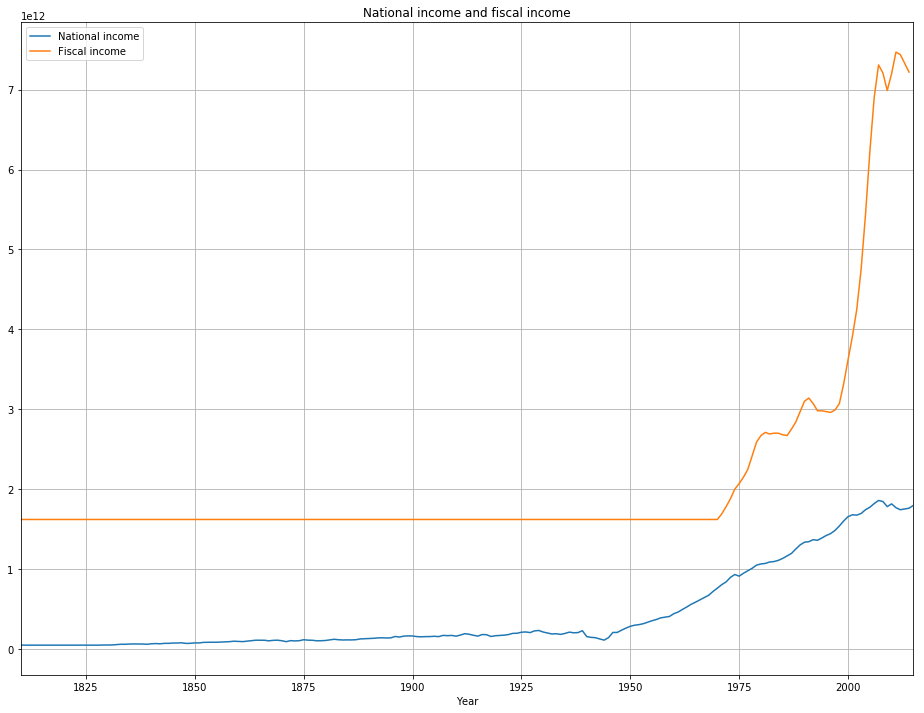

In [27]:
mnninc999i_linear = data['mnninc999i'].interpolate()
mpwnfa999i_linear = data['mpwnfa999i'].interpolate()

# switch to a line plot
fig = plt.gcf()
fig.set_size_inches(16, 12)
line1, = plt.plot(data['year'].values, mnninc999i_linear.values, label='National income')
line2, = plt.plot(data['year'].values, mpwnfa999i_linear.values, label='Fiscal income')
plt.legend(handles=[line1, line2])

# Label the axes
plt.xlabel('Year')
#plt.ylabel('Percent')

#label the figure
plt.title('National income and fiscal income')

# to make more honest, start they y axis at 0
#plt.axis([1810, 2015, 0, 1])
plt.xlim(1810, 2015)
plt.grid()
plt.show()

### Net personal wealth and market-value national wealth ###

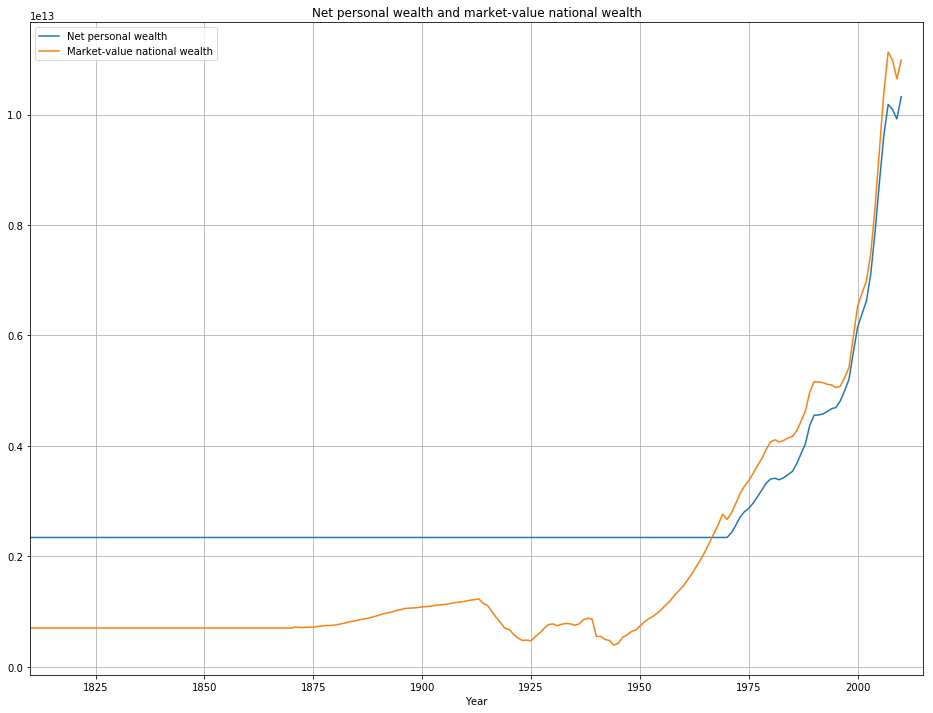

In [28]:
mhweal999i_linear = data['mhweal999i'].interpolate()
mnweal999i_linear = data['mnweal999i'].interpolate()

# switch to a line plot
fig = plt.gcf()
fig.set_size_inches(16, 12)
line1, = plt.plot(data['year'].values, mhweal999i_linear.values, label='Net personal wealth')
line2, = plt.plot(data['year'].values, mnweal999i_linear.values, label='Market-value national wealth')
plt.legend(handles=[line1, line2])

# Label the axes
plt.xlabel('Year')
#plt.ylabel('Percent')

#label the figure
plt.title('Net personal wealth and market-value national wealth')

# to make more honest, start they y axis at 0
#plt.axis([1810, 2015, 0, 1])
plt.xlim(1810, 2015)
plt.grid()
plt.show()

<left><h3 style="font-size:2em;color:#2467C0">Equations of relationships between wealth, income, saving rate and capital return</h3></left>

definition national income is equal to 

$ Y_{t} = Y_{Lt} + r_{t} w_{t} $

$ r_{t} = \frac{Y_{t} - Y_{Lt}}{w_{t}} = \frac{Y_{t} - \alpha_{t} Y_{t}}{w_{t}} = \frac{(1 - \alpha_{t}) Y_{t}}{w_{t}} $

$ Y_{t,90-100\%} = Y_{Lt,90-100\%} + r_{t,90-100\%} w_{t,90-100\%} $

$ r_{t,90-100\%} = \frac{(1 - \alpha_{t}) Y_{t,90-100\%}}{w_{t,90-100\%}} $

$ Y_{t,0-90\%} = Y_{Lt,0-90\%} + r_{t,0-90\%} w_{t,0-90\%} $

$ r_{t,0-90\%} = \frac{(1 - \alpha_{t}) Y_{t,0-90\%}}{w_{t,0-90\%}} $

mnninc999i: National income ($ Y_{Lt} $)

labor_income_share: Labor income share ($ \alpha $)

mnweal999i:  Market-value national wealth ($ w_{t} $)

p0p90_shweal992j: Share of net personal wealth of 0-90%

p90p100_shweal992j:	Share of net personal wealth of 90-100%

p0p90_sptinc992j: Share of pre-tax national Income of 0-90%

p90p100_sptinc992j: Share of pre-tax national Income of 90-100%

In [29]:
YCt = data['mnninc999i'] * (1 - data['labor_income_share'])
YCt_p0p90 = YCt * data['p0p90_sptinc992j']
YCt_p90p100 = YCt * data['p90p100_sptinc992j']

In [30]:
YLt = data['mnninc999i'] * data['labor_income_share']
YLt_p0p90 = YLt * data['p0p90_sptinc992j']
YLt_p90p100 = YLt * data['p90p100_sptinc992j']

In [31]:
wt = data['mnweal999i']
wt_p0p90 = wt * data['p0p90_shweal992j']
wt_p90p100 = wt * data['p90p100_shweal992j']

In [32]:
rt = YCt / wt
rt_p0p90 = YCt_p0p90 / wt_p0p90
rt_p90p100 = YCt_p90p100 / wt_p90p100

In [33]:
#type(data['mnninc999i'])
#dfp0p90 = pd.DataFrame({'p0p90_shweal992j': pd.Series(p0p90w_data.loc[:, 'shweal992j'].values, index=wealth_index)})
df_result = pd.DataFrame({'year': data['year']})
df_result['National income'] = data['mnninc999i']
df_result['Income share 0-90%'] = data['p0p90_sptinc992j']
df_result['Income share 90-100%'] = data['p90p100_sptinc992j']
df_result['Labor income share'] = data['labor_income_share']
df_result['Capital income'] = YCt
df_result['Capital income 0-90%'] =YCt_p0p90
df_result['Capital income 90-100%'] =YCt_p90p100
df_result['Labor income'] = YLt
df_result['Labor income 0-90%'] =YLt_p0p90
df_result['Labor income 90-100%'] =YLt_p90p100
df_result['Market-value national wealth'] = wt
df_result['Wealth share 0-90%'] = data['p0p90_shweal992j']
df_result['Wealth share 90-100%'] = data['p90p100_shweal992j']
df_result['Market-value national wealth 0-90%'] = wt_p0p90
df_result['Market-value national wealth 90-100%'] = wt_p90p100
df_result['return to capital'] = rt
df_result['return to capital 0-90%'] = rt_p0p90
df_result['return to capital 90-100%'] = rt_p90p100

In [34]:
df_result

,year,National income,Income share 0-90%,Income share 90-100%,Labor income share,Capital income,Capital income 0-90%,Capital income 90-100%,Labor income,Labor income 0-90%,Labor income 90-100%,Market-value national wealth,Wealth share 0-90%,Wealth share 90-100%,Market-value national wealth 0-90%,Market-value national wealth 90-100%,return to capital,return to capital 0-90%,return to capital 90-100%
0,2015,1.796754e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,1.760919e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,1.751854e+12,0.677072,0.322928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,1.742135e+12,0.670395,0.329605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.454879,0.545121,NaN,NaN,NaN,NaN,NaN
4,2011,1.767332e+12,0.663457,0.336543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.449258,0.550742,NaN,NaN,NaN,NaN,NaN
5,2010,1.815188e+12,0.673422,0.326578,0.74,4.719489e+11,3.178208e+11,1.541280e+11,1.343239e+12,9.045670e+11,4.386721e+11,1.098891e+13,0.440864,0.559136,4.844613e+12,6.144300e+12,0.042948,0.065603,0.025085
6,2009,1.781369e+12,0.676430,0.323570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.064688e+13,0.459474,0.540526,4.891965e+12,5.754915e+12,NaN,NaN,NaN
7,2008,1.845184e+12,0.657427,0.342573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.098487e+13,0.467965,0.532035,5.140536e+12,5.844327e+12,NaN,NaN,NaN
8,2007,1.857720e+12,0.653987,0.346013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.113082e+13,0.464112,0.535888,5.165941e+12,5.964874e+12,NaN,NaN,NaN
9,2006,1.819036e+12,0.662782,0.337218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.039031e+13,0.471853,0.528147,4.902705e+12,5.487609e+12,NaN,NaN,NaN


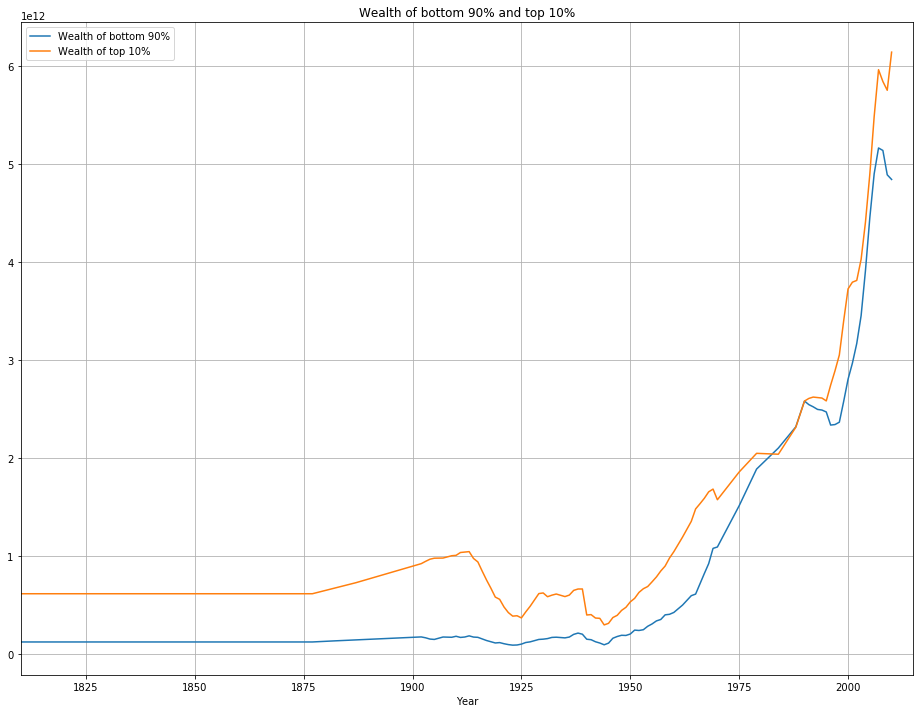

In [35]:
share_wealth_p0p90 = df_result['Market-value national wealth 0-90%'].interpolate()
share_wealth_p90p100 = df_result['Market-value national wealth 90-100%'].interpolate()

# switch to a line plot
fig = plt.gcf()
fig.set_size_inches(16, 12)
line1, = plt.plot(df_result['year'].values, share_wealth_p0p90.values, label='Wealth of bottom 90%')
line2, = plt.plot(df_result['year'].values, share_wealth_p90p100.values, label='Wealth of top 10%')
plt.legend(handles=[line1, line2])

# Label the axes
plt.xlabel('Year')
#plt.ylabel('Percent')

#label the figure
plt.title('Wealth of bottom 90% and top 10%')

# to make more honest, start they y axis at 0
#plt.axis([1810, 2015, 0, 1])
plt.xlim(1810, 2015)
plt.grid()
plt.show()

### share of wealth between bottom 90% and top 10% ###

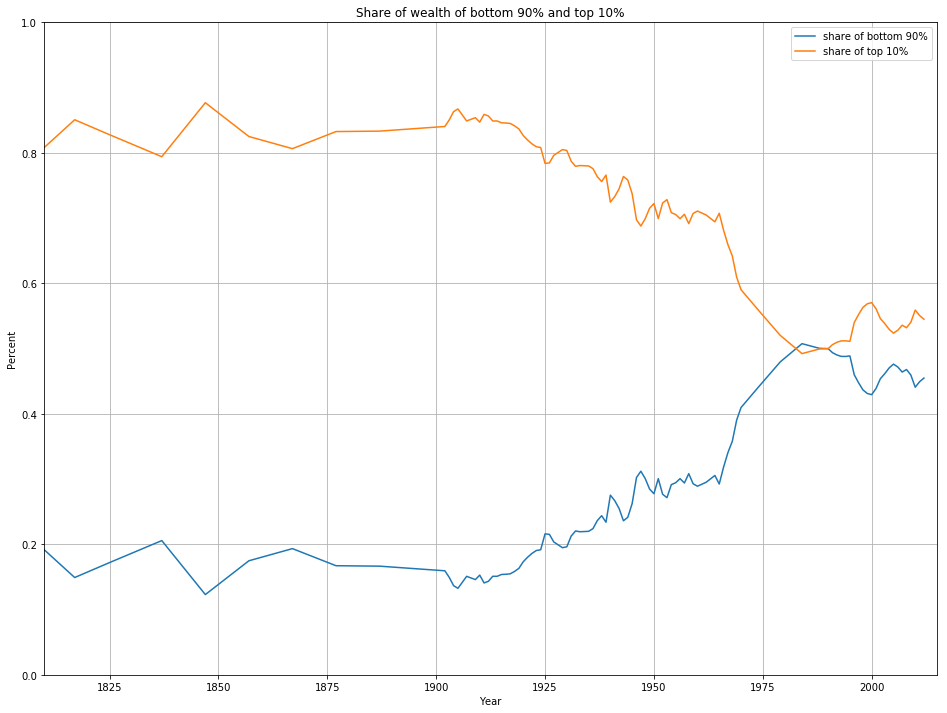

In [36]:
p0p90pw_shweal992j_linear = data['p0p90_shweal992j'].interpolate()
p90p100w_shweal992j_linear = data['p90p100_shweal992j'].interpolate()

# switch to a line plot
fig = plt.gcf()
fig.set_size_inches(16, 12)
line1, = plt.plot(data['year'].values, p0p90pw_shweal992j_linear.values, label='share of bottom 90%')
line2, = plt.plot(data['year'].values, p90p100w_shweal992j_linear.values, label='share of top 10%')
plt.legend(handles=[line1, line2])

# Label the axes
plt.xlabel('Year')
plt.ylabel('Percent')

#label the figure
plt.title('Share of wealth of bottom 90% and top 10%')

# to make more honest, start they y axis at 0
plt.axis([1810, 2015, 0, 1])
plt.grid()
plt.show()

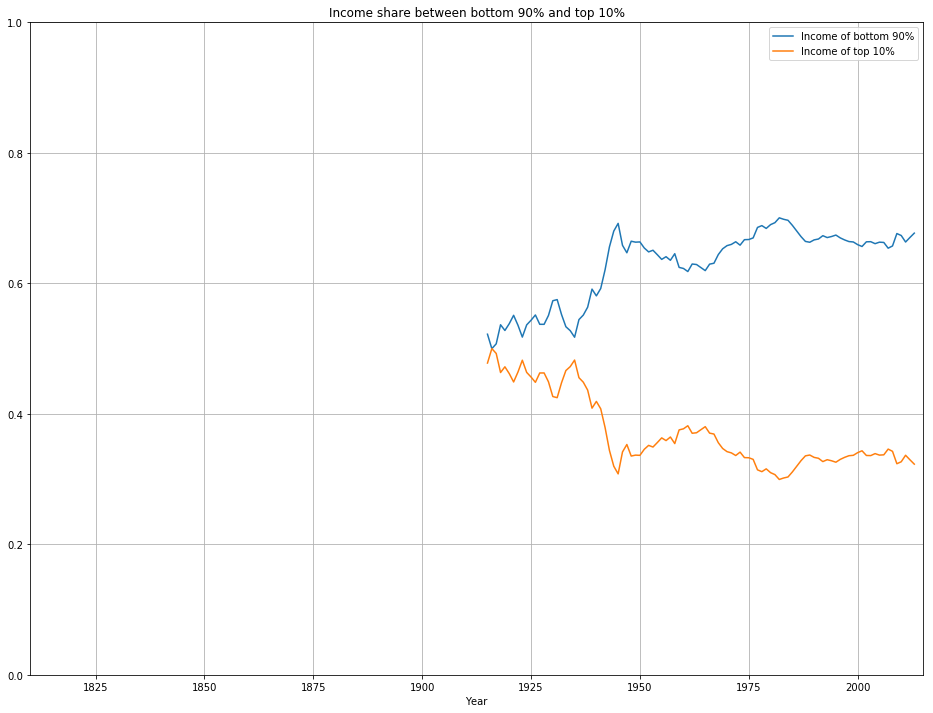

In [37]:
share_income_p0p90 = df_result['Income share 0-90%']
share_income_p90p100 = df_result['Income share 90-100%']
years = list(range(1900,2015))

# switch to a line plot
fig = plt.gcf()
fig.set_size_inches(16, 12)
line1, = plt.plot(df_result['year'].values, share_income_p0p90.values, label='Income of bottom 90%')
line2, = plt.plot(df_result['year'].values, share_income_p90p100.values, label='Income of top 10%')
plt.legend(handles=[line1, line2])

# Label the axes
plt.xlabel('Year')
#plt.ylabel('Percent')

#label the figure
plt.title('Income share between bottom 90% and top 10%')

# to make more honest, start they y axis at 0
plt.axis([1810, 2015, 0, 1])
#plt.xlim(1810, 2015)
plt.grid()
plt.show()

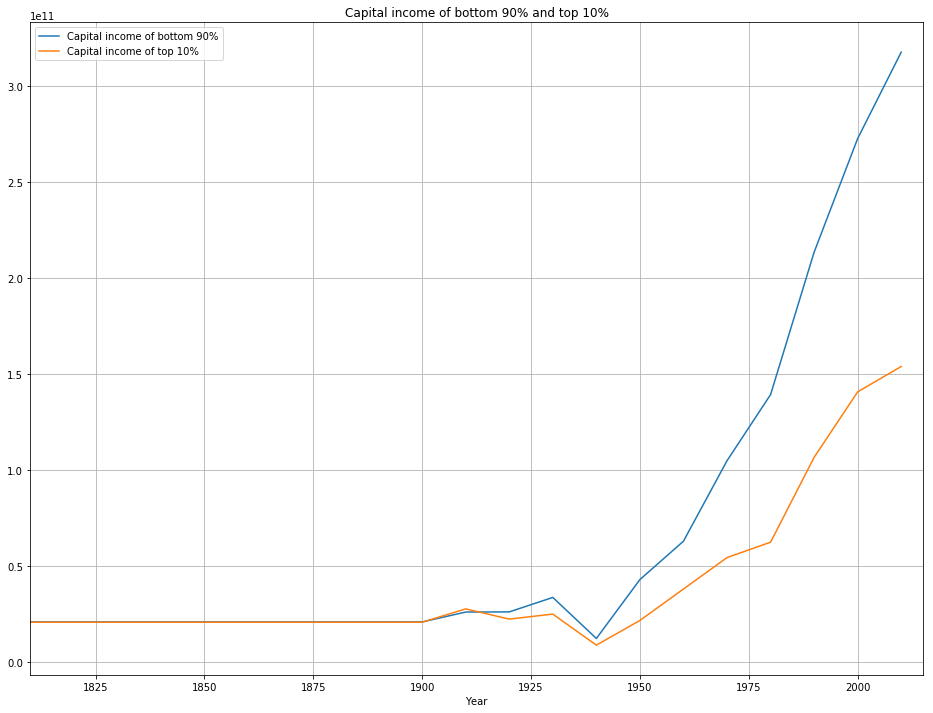

In [38]:
capital_income_p0p90 = df_result['Capital income 0-90%'].interpolate()
capital_income_p90p100 = df_result['Capital income 90-100%'].interpolate()

# switch to a line plot
fig = plt.gcf()
fig.set_size_inches(16, 12)
line1, = plt.plot(df_result['year'].values, capital_income_p0p90.values, label='Capital income of bottom 90%')
line2, = plt.plot(df_result['year'].values, capital_income_p90p100.values, label='Capital income of top 10%')
plt.legend(handles=[line1, line2])

# Label the axes
plt.xlabel('Year')
#plt.ylabel('Percent')

#label the figure
plt.title('Capital income of bottom 90% and top 10%')

# to make more honest, start they y axis at 0
#plt.axis([1810, 2015, 0, 1])
plt.xlim(1810, 2015)
plt.grid()
plt.show()

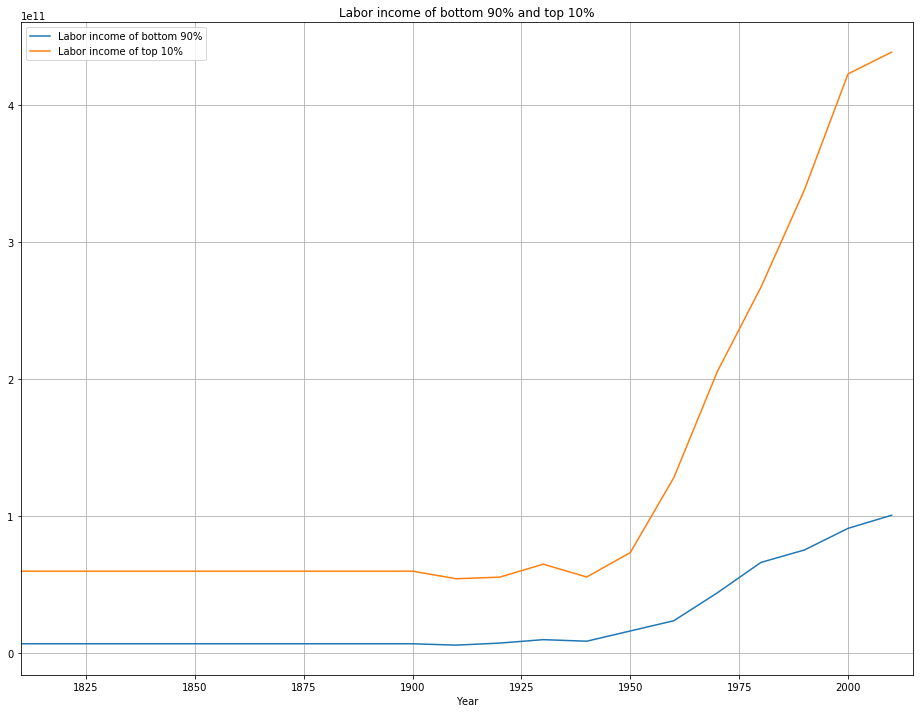

In [39]:
labor_income_p0p90 = df_result['Labor income 0-90%'].interpolate() / 9
labor_income_p90p100 = df_result['Labor income 90-100%'].interpolate()

# switch to a line plot
fig = plt.gcf()
fig.set_size_inches(16, 12)
line1, = plt.plot(df_result['year'].values, labor_income_p0p90.values, label='Labor income of bottom 90%')
line2, = plt.plot(df_result['year'].values, labor_income_p90p100.values, label='Labor income of top 10%')
plt.legend(handles=[line1, line2])

# Label the axes
plt.xlabel('Year')
#plt.ylabel('Percent')

#label the figure
plt.title('Labor income of bottom 90% and top 10%')

# to make more honest, start they y axis at 0
#plt.axis([1810, 2015, 0, 1])
plt.xlim(1810, 2015)
plt.grid()
plt.show()

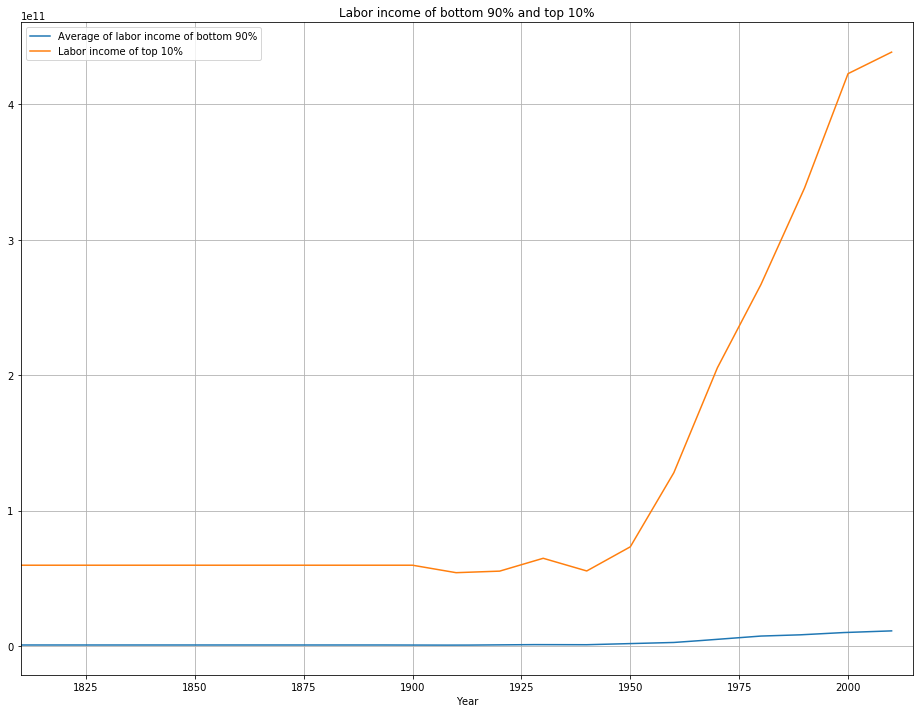

In [40]:
labor_income_p0p90_9 = labor_income_p0p90 / 9
labor_income_p90p100 = df_result['Labor income 90-100%'].interpolate()

# switch to a line plot
fig = plt.gcf()
fig.set_size_inches(16, 12)
line1, = plt.plot(df_result['year'].values, labor_income_p0p90_9.values, label='Average of labor income of bottom 90%')
line2, = plt.plot(df_result['year'].values, labor_income_p90p100.values, label='Labor income of top 10%')
plt.legend(handles=[line1, line2])

# Label the axes
plt.xlabel('Year')
#plt.ylabel('Percent')

#label the figure
plt.title('Labor income of bottom 90% and top 10%')

# to make more honest, start they y axis at 0
#plt.axis([1810, 2015, 0, 1])
plt.xlim(1810, 2015)
plt.grid()
plt.show()

In [41]:
df_result['return to capital 0-90%'].dropna() / 9

5      0.007289
15     0.010806
25     0.009192
45     0.010679
55     0.016512
65     0.023421
75     0.009162
85     0.024715
95     0.024965
105    0.016049
Name: return to capital 0-90%, dtype: float64

In [42]:
df_result['return to capital 90-100%'].dropna()

5      0.025085
15     0.037809
25     0.041355
45     0.034680
55     0.036582
65     0.041059
75     0.022608
85     0.040382
95     0.040411
105    0.027684
Name: return to capital 90-100%, dtype: float64

<left><h3 style="font-size:2em;color:#2467C0">Compare each 10% group from bottom 10% to top 10%</h3></left>

In [43]:
share_wealth_data = wealth_data[['year', 'perc', 'shweal992j']]
share_wealth = {}

for i in range(0, 100, 10):
    share_wealth["p" + str(i) + "p" + str(i+10)] = share_wealth_data[share_wealth_data['perc'] == ("p" + str(i))]
    #print(share_wealth["p" + str(i) + "p" + str(i+10)])

for i in range(0, 90, 10):
    #print("p" + str(i) + "p" + str(i+10), "p" + str(i))
    share_wealth["p" + str(i) + "p" + str(i+10)]['shweal992j'] = \
                                         share_wealth["p" + str(i) + "p" + str(i+10)]['shweal992j'] - \
                                         share_wealth["p" + str(i+10) + "p" + str(i+20)]['shweal992j'].values

share_wealth_mask = data['year'].isin(share_wealth['p90p100']['year'])
share_wealth_index = share_wealth_mask[share_wealth_mask == True].index.values

years = list(range(2015, 1806, -1))
df_share_wealth = pd.DataFrame({'year': pd.Series(years, index=pd.RangeIndex(len(years)))})

#print(share_wealth['p0p10'])
#print(df_share_wealth)

for i in range(0, 100, 10):
    #print("p" + str(i) + "p" + str(i+10), "p" + str(i))
    #print(share_wealth["p" + str(i) + "p" + str(i+10)].loc[:, 'shweal992j'])
    df = pd.DataFrame({'shweal992j': pd.Series(share_wealth["p" + str(i) + "p" + str(i+10)].loc[:, 'shweal992j'].values, index=share_wealth_index)})
    df_share_wealth["p" + str(i) + "p" + str(i+10) + "_shweal992j"] = df

df_share_wealth.head()
#share_wealth

/home/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,year,p0p10_shweal992j,p10p20_shweal992j,p20p30_shweal992j,p30p40_shweal992j,p40p50_shweal992j,p50p60_shweal992j,p60p70_shweal992j,p70p80_shweal992j,p80p90_shweal992j,p90p100_shweal992j
0,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,0.001019,0.002615,0.005757,0.015978,0.038557,0.059255,0.078597,0.103479,0.149621,0.545121
4,2011,0.000979,0.002524,0.005518,0.014840,0.037117,0.058338,0.078075,0.102771,0.149098,0.550742


In [44]:
share_income = income_data2[['year', 'perc', 'sptinc992j']]
share_income = {}

for i in range(0, 100, 10):
    share_income["p" + str(i) + "p" + str(i+10)] = share_income_data[share_wealth_data['perc'] == ("p" + str(i))]

for i in range(0, 90, 10):
    share_income["p" + str(i) + "p" + str(i+10)]['sptinc992j'] = \
                                         share_income["p" + str(i) + "p" + str(i+10)]['sptinc992j'] - \
                                         share_income["p" + str(i+10) + "p" + str(i+20)]['sptinc992j'].values
    #print(share_wealth["p" + str(i) + "p" + str(i+10)].dropna())

#for k in share_wealth.keys():
#    print("key: " + k)

share_income_mask = data['year'].isin(share_income['p90p100']['year'])
share_income_index = share_income_mask[share_income_mask == True].index.values

years = list(range(2015, 1806, -1))
df_share_income = pd.DataFrame({'year': pd.Series(years, index=pd.RangeIndex(len(years)))})

#print(share_wealth['p0p10'])
#print(df_share_wealth)

for i in range(0, 100, 10):
    df = pd.DataFrame({'sptinc992j': pd.Series(share_income["p" + str(i) + "p" + str(i+10)].loc[:, 'sptinc992j'].values, index=share_wealth_index)})
    df_share_income["p" + str(i) + "p" + str(i+10) + "_sptinc992j"] = df

df_share_income.head()

/home/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,year,p0p10_sptinc992j,p10p20_sptinc992j,p20p30_sptinc992j,p30p40_sptinc992j,p40p50_sptinc992j,p50p60_sptinc992j,p60p70_sptinc992j,p70p80_sptinc992j,p80p90_sptinc992j,p90p100_sptinc992j
0,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,0.012078,0.028750,0.048870,0.061736,0.073660,0.085175,0.097916,0.118502,0.150385,0.322928
3,2012,0.012495,0.028446,0.047798,0.060702,0.072571,0.084383,0.097171,0.117366,0.149462,0.329605
4,2011,0.012498,0.027665,0.046538,0.059963,0.071670,0.083855,0.096487,0.116272,0.148510,0.336543


In [45]:
YCt = data['mnninc999i'] * (1 - data['labor_income_share'])
capital_income_dict = {}

for i in range(0,100, 10):
    capital_income_dict["p" + str(i) + "p" + str(i+10)] = YCt * df_share_income["p" + str(i) + "p" + str(i+10) + "_sptinc992j"]

#capital_income_dict

In [46]:
wt = data['mnweal999i']
wealth_dict = {}

for i in range(0, 100, 10):
    #print(df_share_wealth["p" + str(i) + "p" + str(i+10) + "_shweal992j"])
    wealth_dict["p" + str(i) + "p" + str(i+10)] = wt * df_share_wealth["p" + str(i) + "p" + str(i+10) + "_shweal992j"]

#wealth_dict

In [47]:
rt = YCt / wt
rt_dict= {}

for i in range(0, 100, 10):
    rt_dict["p" + str(i) + "p" + str(i+10)] = capital_income_dict["p" + str(i) + "p" + str(i+10)] \
                                            / wealth_dict["p" + str(i) + "p" + str(i+10)]

for i in range(0, 100, 10):
    print("p" + str(i) + "p" + str(i+10) + ": " + str(rt_dict["p" + str(i) + "p" + str(i+10)][5]), \
          str(capital_income_dict["p" + str(i) + "p" + str(i+10)][5]), \
          str(wealth_dict["p" + str(i) + "p" + str(i+10)][5]))
#print(rt_dict['p0p10'][5], capital_income_dict['p0p10'][5], wealth_dict['p0p10'][5])
#print(rt_dict['p90p100'][5], capital_income_dict['p90p100'][5], wealth_dict['p90p100'][5])


p0p10: 0.609088014956 6277426921.24 10306272274.4
p10p20: 0.487930300292 13051720108.7 26749148599.5
p20p30: 0.386414518393 22208569044.8 57473433289.1
p30p40: 0.196837423923 28972257092.6 147188763779.0
p40p50: 0.0917483133115 34377699609.6 374695712311.0
p50p60: 0.0653421592504 40194492147.0 615138719139.0
p60p70: 0.0547801751031 46267523989.0 844603433668.0
p70p80: 0.0493205289964 55463896057.6 1.12456003993e+12
p80p90: 0.0431944384925 71007247323.9 1.64389791376e+12
p90p100: 0.0250847160229 154128025587.0 6.14430019645e+12


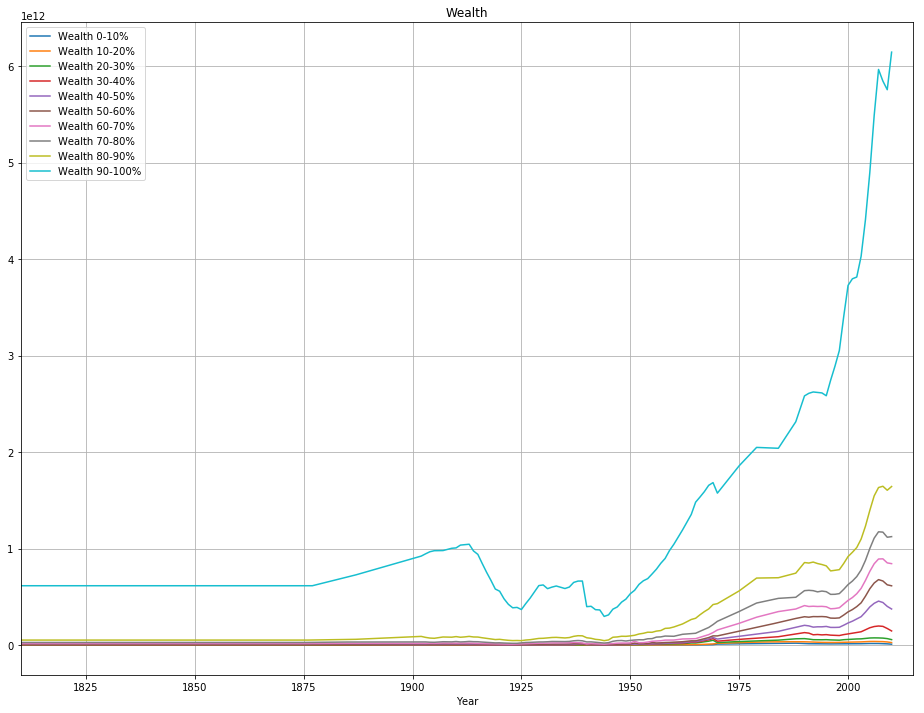

In [54]:
wealth_line = {}
for i in range(0, 100, 10):
    wealth_line["p" + str(i) + "p" + str(i+10)] = wealth_dict["p" + str(i) + "p" + str(i+10)].interpolate()

# switch to a line plot
fig = plt.gcf()
fig.set_size_inches(16, 12)

lines = {}
for i in range(0, 100, 10):
    lines[str(i)], = plt.plot(data['year'].values, wealth_line["p" + str(i) + "p" + str(i+10)].values, \
                             label="Wealth " + str(i) + "-" + str(i+10) + "%")

#print(list(lines.values()))
plt.legend(handles=list(lines.values()))

# Label the axes
plt.xlabel('Year')
#plt.ylabel('Percent')

#label the figure
plt.title('Wealth')

# to make more honest, start they y axis at 0
#plt.axis([1810, 2015, 0, 1])
plt.xlim(1810, 2015)
plt.grid()
plt.show()

fig.savefig('wealth.png')

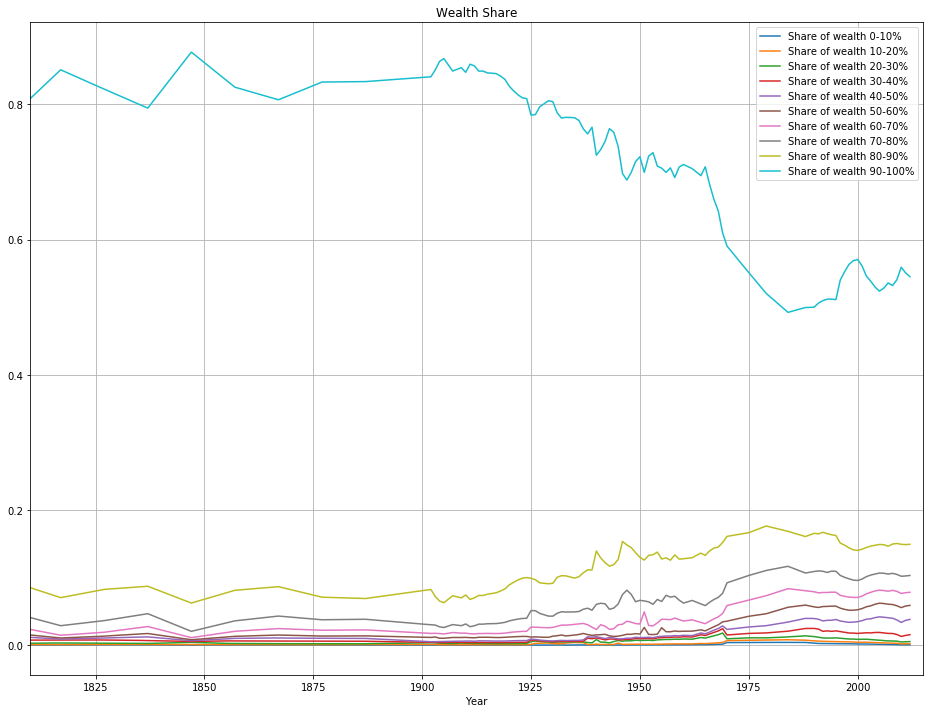

In [49]:
swealth_line = {}
for i in range(0, 100, 10):
    swealth_line["p" + str(i) + "p" + str(i+10)] = df_share_wealth["p" + str(i) + "p" + str(i+10) + "_shweal992j"].interpolate()

# switch to a line plot
fig = plt.gcf()
fig.set_size_inches(16, 12)

lines = {}
for i in range(0, 100, 10):
    lines[str(i)], = plt.plot(data['year'].values, swealth_line["p" + str(i) + "p" + str(i+10)].values, \
                             label="Share of wealth " + str(i) + "-" + str(i+10) + "%")

#print(list(lines.values()))
plt.legend(handles=list(lines.values()))

# Label the axes
plt.xlabel('Year')
#plt.ylabel('Percent')

#label the figure
plt.title('Wealth Share')

# to make more honest, start they y axis at 0
#plt.axis([1810, 2015, 0, 1])
plt.xlim(1810, 2015)
plt.grid()
plt.show()
fig.savefig('sharewealth.png')

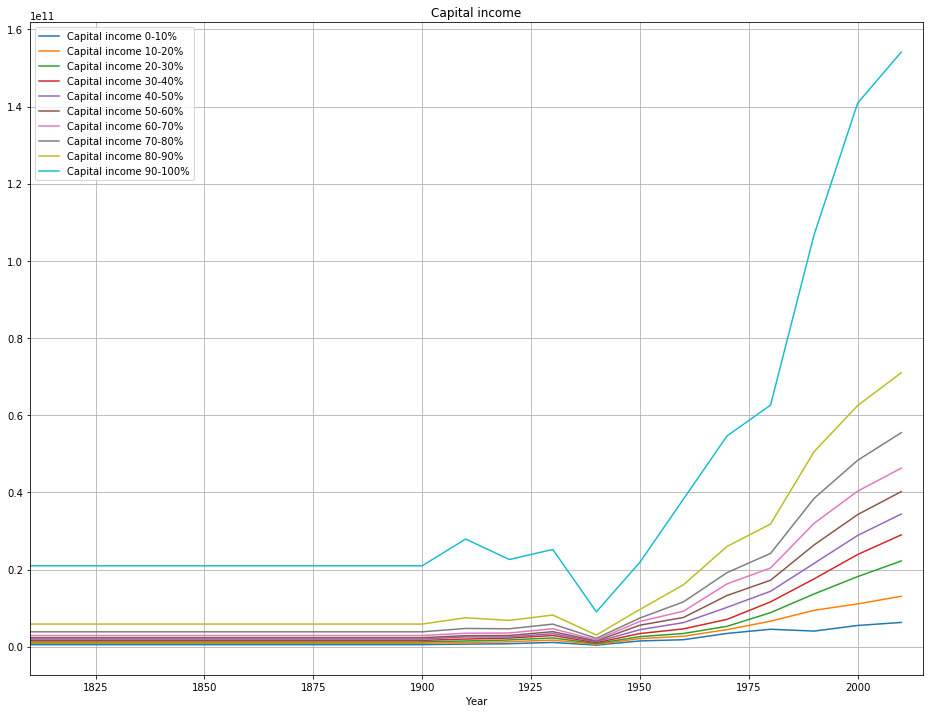

In [50]:
capital_income_line = {}
for i in range(0, 100, 10):
    capital_income_line["p" + str(i) + "p" + str(i+10)] = capital_income_dict["p" + str(i) + "p" + str(i+10)].interpolate()

# switch to a line plot
fig = plt.gcf()
fig.set_size_inches(16, 12)

lines = {}
for i in range(0, 100, 10):
    lines[str(i)], = plt.plot(data['year'].values, capital_income_line["p" + str(i) + "p" + str(i+10)].values, \
                             label="Capital income " + str(i) + "-" + str(i+10) + "%")

#print(list(lines.values()))
plt.legend(handles=list(lines.values()))

# Label the axes
plt.xlabel('Year')
#plt.ylabel('Percent')

#label the figure
plt.title('Capital income')

# to make more honest, start they y axis at 0
#plt.axis([1810, 2015, 0, 1])
plt.xlim(1810, 2015)
plt.grid()
plt.show()
fig.savefig('capitalincme.png')